# **1. Konten**
* [Konten](#intro)
* [2 Problem Statement](#data_review)
* [3 Tujuan](#data_review)
* [4 Pra-Pemrosesan Data](#data_review)
    * [4.1  Memuat Library](#header_style)
    * [4.2  Memuat Data](#header_style)
    * [4.3  Mengeksplorasi Data Awal](#header_style)
        * [4.3.1  Kesimpulan dan Langkah-Langkah Selanjutnya](#header_style)
    * [4.4  Mengatasi Nilai-Nilai yang Hilang](#header_style)
        * [4.4.1  Memperbaiki Nilai Yang Hilang Pada Kolom is_4wd](#header_style)
        * [4.4.2  Memperbaiki Nilai Yang Hilang Pada Kolom paint_color](#header_style)
        * [4.4.3  Memperbaiki Nilai Yang Hilang Pada Kolom model_year](#header_style)
        * [4.4.4  Memperbaiki Nilai Yang Hilang Pada Kolom Cylinders](#header_style)        
        * [4.4.5  Memperbaiki Nilai Yang Hilang Pada Kolom Odometer](#header_style)
    * [4.5  Memperbaiki Tipe Data](#header_style)        
    * [4.6  Memperbaiki Kualitas Data](#header_style)  
    * [4.7  Memeriksa Data yang Sudah Bersih](#header_style)  
    * [4.8  Mempelajari Parameter Inti](#header_style)  
    * [4.9  Mempelajari dan Menangani Outlier](#header_style)  
    * [4.10  Mempelajari Parameter Inti Tanpa Outlier](#header_style)  
    * [4.11  Masa Berlaku Iklan](#header_style)  
    * [4.12  Harga Rata-Rata Setiap Jenis Kendaraan](#header_style)  
    * [4.13  Faktor Harga](#header_style)  

# **2. Problem Statement**

Crankshaft List merupakan satu dari sekian banyak perusahan pengiklanan kendaran di Eropa. Ratusan iklan kendaraan gratis ditayangkan di situs web mereka setiap hari. Beberapa pekan lalu, mereka telah mengontrak perusahaan konsultan kendaran kami untuk memahami faktor-faktor yang menentukan harga kendaraan. Secara khusus, mereka ingin memahami faktor-faktor yang mempengaruhi harga mobil di pasar. Kami telah diberikan akses terhadap sekumpulan data yang mereka himpun selama beberapa tahun terakhir dengan memuat sejumlah variabel/kolom sebagai berikut :
* **price**   : Harga jual Kendaraan
* **model_year** : Tahun Model Kendaraan yang dijual
* **model**  : Model Kendaraan
* **condition**  : Kondisi kendaraan yang dijual
* **cylinders**  : Tipe silinder kendaraan
* **fuel**  : Bahan bakar kendaraan (gas, disel, dan lain-lain)
* **odometer**  : Jarak tempuh kendaraan saat iklan ditayangkan
* **transmission**  : Tipe transmisi kendaraan
* **paint_color**  : Tipe warna kendaraan
* **is_4wd**  : Apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
* **date_posted**  : Tanggal iklan ditayangkan
* **days_listed**  : Jumlah hari iklan ditayangkan hingga dihapus

# **3.Tujuan**

Tujuan utama dari proyek yang akan kami jalankan adalah untuk melakukan analisis data eksplorasi sederhana dalam upaya mengidentifikasi pola - pola menarik yang dapat menjawab pertanyaan berikut:
1. Jenis kendaraan apa yang paling banyak diiklankan pada situs web?
2. Setiap jenis kendaraan memiliki perbedaan tingkat harga rata-rata yang tinggi
2. Fitur apa yang paling berkontribusi terhadap harga kendaraan?

Pada akhirnya, manajemen dapat menggunakan model analisa yang kami bangun untuk memahami dengan tepat bagaimana mereka dapat memanipulasi desain mobil, strategi bisnis, dinamika penetapan harga pasar yang baru, dll.

# **4. Pra-pemrosesan Data**

## **4.1. Memuat Library**

In [44]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [45]:
# Muat semua library

import pandas as pd
import missingno as msno # untuk mengidentifikasi pola missing value
import seaborn as sns
from scipy.stats import kstest
from scipy.stats import lognorm
import numpy as np
import matplotlib.pyplot as plt

## **4.2. Memuat Data**

In [46]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [153]:
# Muat datanya
df = pd.read_excel('/kaggle/input/vehicles-us-data/vehicles_us_data (1).xlsx')
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


## **4.3. Mengeksplorasi Data Awal**

In [154]:
df.shape

(51525, 13)

**Temuan :**

Data yang berhasil kami peroleh dari data engineer yaitu sebanyak 51.525 baris dengan 13 kolom

In [155]:
# tampilkan informasi/rangkuman umum tentang DataFrame
print(df.info())
print()
print(df.isnull().sum())
print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB
None

price               0
model_year       3619
model     

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,2018-10-25 01:57:46.270742528,39.55476
min,1.000000,1908.000000,3.000000,0.000000,1.0,2018-05-01 00:00:00,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,2018-07-29 00:00:00,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,2018-10-25 00:00:00,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,2019-01-21 00:00:00,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,2019-04-19 00:00:00,271.00000
std,10040.803015,6.282065,1.660360,65094.611341,0.0,NaN,28.20427


In [156]:
# Identifikasi dataset dengan nilai harga kendaraan yang tidak wajar

fill_price = df['price'] < 100
df_price_unfair = df.loc[fill_price]
df_price_unfair.sort_values('price', ascending=False)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
15151,85,2012.0,ford fusion se,good,4.0,gas,NaN,automatic,sedan,white,NaN,2019-01-30,57
11840,85,2007.0,toyota corolla,good,4.0,gas,110850.0,automatic,sedan,silver,NaN,2018-11-20,48
11785,85,2009.0,honda cr-v,good,4.0,gas,175874.0,automatic,SUV,green,NaN,2018-12-28,56
11784,85,NaN,ram 1500,good,8.0,gas,133691.0,automatic,truck,NaN,NaN,2018-10-16,160
15695,80,2004.0,nissan murano,good,6.0,gas,NaN,automatic,SUV,NaN,NaN,2019-03-10,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13327,1,2015.0,ford edge,excellent,6.0,gas,NaN,automatic,SUV,black,1.0,2018-09-27,106
13328,1,2019.0,chevrolet tahoe,excellent,8.0,gas,1003.0,automatic,SUV,black,1.0,2019-02-16,15
13329,1,2014.0,chevrolet camaro,excellent,10.0,gas,NaN,other,coupe,black,1.0,2019-03-15,21
13330,1,2017.0,toyota corolla,excellent,4.0,gas,NaN,automatic,sedan,white,1.0,2019-02-07,18


In [157]:
# tampilkan 10 sample data di posisi teratas
df.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [158]:
# tampilkan 10 sampel data di posisi terbawah
df.tail(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


**Kesimpulan :**

1. Terdapat 5 kolom (model_year, cylinders, odometer, is_4wd, date_posted) dengan tipe data yang keliru
2. Terdapat sejumlah kolom dengan null, dengan persentase yang telah diurutkan sebagai berikut: is_4wd (50.4%), paint_color (18%), odometer (15.3%), cylinders (10.2%), model_year (7.02%)
3. Kami menemukan nilai minimum yang cukup janggal untuk kolom price, dimana harga kendaraan hanya sebesar $1
4. Kami menemukan fakta bahwa kolom is_4wd tidak memiliki variasi nilai, dimana seluruh nilainya adalah 1 (kami mempertimbangkan untuk mengisi 49.6% sisa dari baris null dengan angka 0)
5. Sejauh ini dataset kami terbebas dari nilai *typo* untuk kolom-kolom yang bertipe data object

### **4.3.1. Kesimpulan dan Langkah-Langkah Selanjutnya**

Hasil identifikasi awal yang kami lakukan terhadap karakteristik nilai data untuk masing - masing kolom menunjukkan sebagian besar data sudah normal (bukan menjelaskan distribusinya). Dimana kami tidak menemukan nilai baris yang *typo* ataupun yang bernilai tidak wajar untuk seluruh kolom yang bertipe *object*, begitu pula dengan sejumlah kolom numerik. Kami menyimpulkan bahwa kualitas data yang kami terima sejauh ini sudah cukup baik, meskipun masih terlalu dini untuk dapat kami aplikasikan secara langsung kedalam proses analisis. Kami masih harus berfokus untuk menangani sejumlah hal yang berkaitan dengan mengubah tipe data, memperbaiki nilai yang janggal pada beberapa kolom, serta sejumlah tindakan krusial yang berhubungan dengan penyempurnaan kualitas data


## **4.4. Mengatasi Nilai-Nilai yang Hilang**

In [159]:
df2 = df.copy()

Kami telah berhasil mengidentifikasi baris yang hilang pada sejumlah kolom berikut yang kami urutkan berdasarkan tingkat persentasenya :
1. is_4wd (50.4%)
2. paint_color (18%)
3. odometer (15.3%)
4. cylinders (10.2%)
5. model_year (7.02%)

Sebagian besar kolom dengan baris nilai yang hilang ini masih menjadi perhatian utama kami, dikarenakan memiliki relevansi yang kuat terhadap sejumlah hipotesis yang telah kami ajukan. Kami juga telah menetapkan suatu margin terhadap baris null yang memungkinkan untuk dapat kami hilangkan, dimana tingkat persentase *missing value*nya berada diangka 3% kebawah. Namun, apabila diperhatikan, seluruh baris nilai yang hilang untuk kolom yang kami memiliki berada diatas margin tersebut, dimana bahkan persentase terendah untuk baris hilang kami masih di level 7.02%.

Dengan tingginya persentase baris yang hilang ini, maka diawal kami akan mulai mengidentifikasi apakah terdapat suatu pola terhadap nilai yang hilang :

<Axes: >

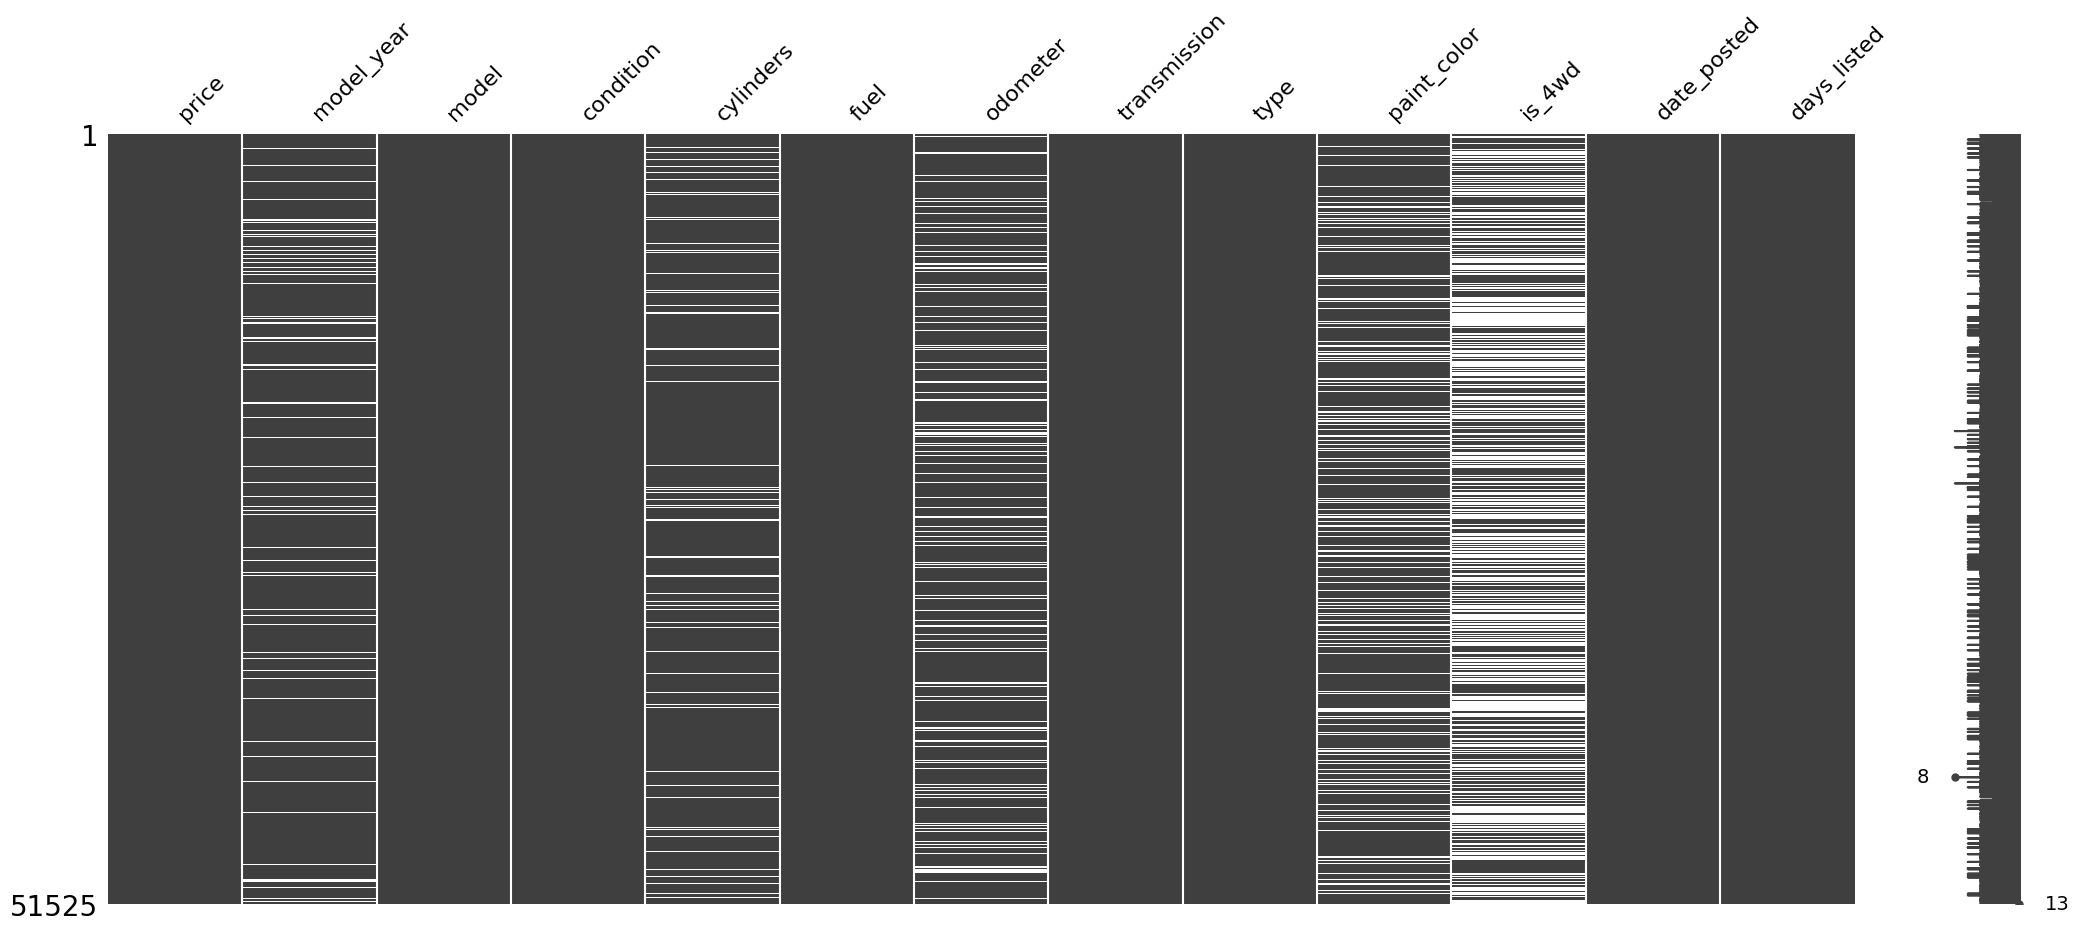

In [160]:
# Identifikasi baris null pada data
msno.matrix(df2)

<Axes: >

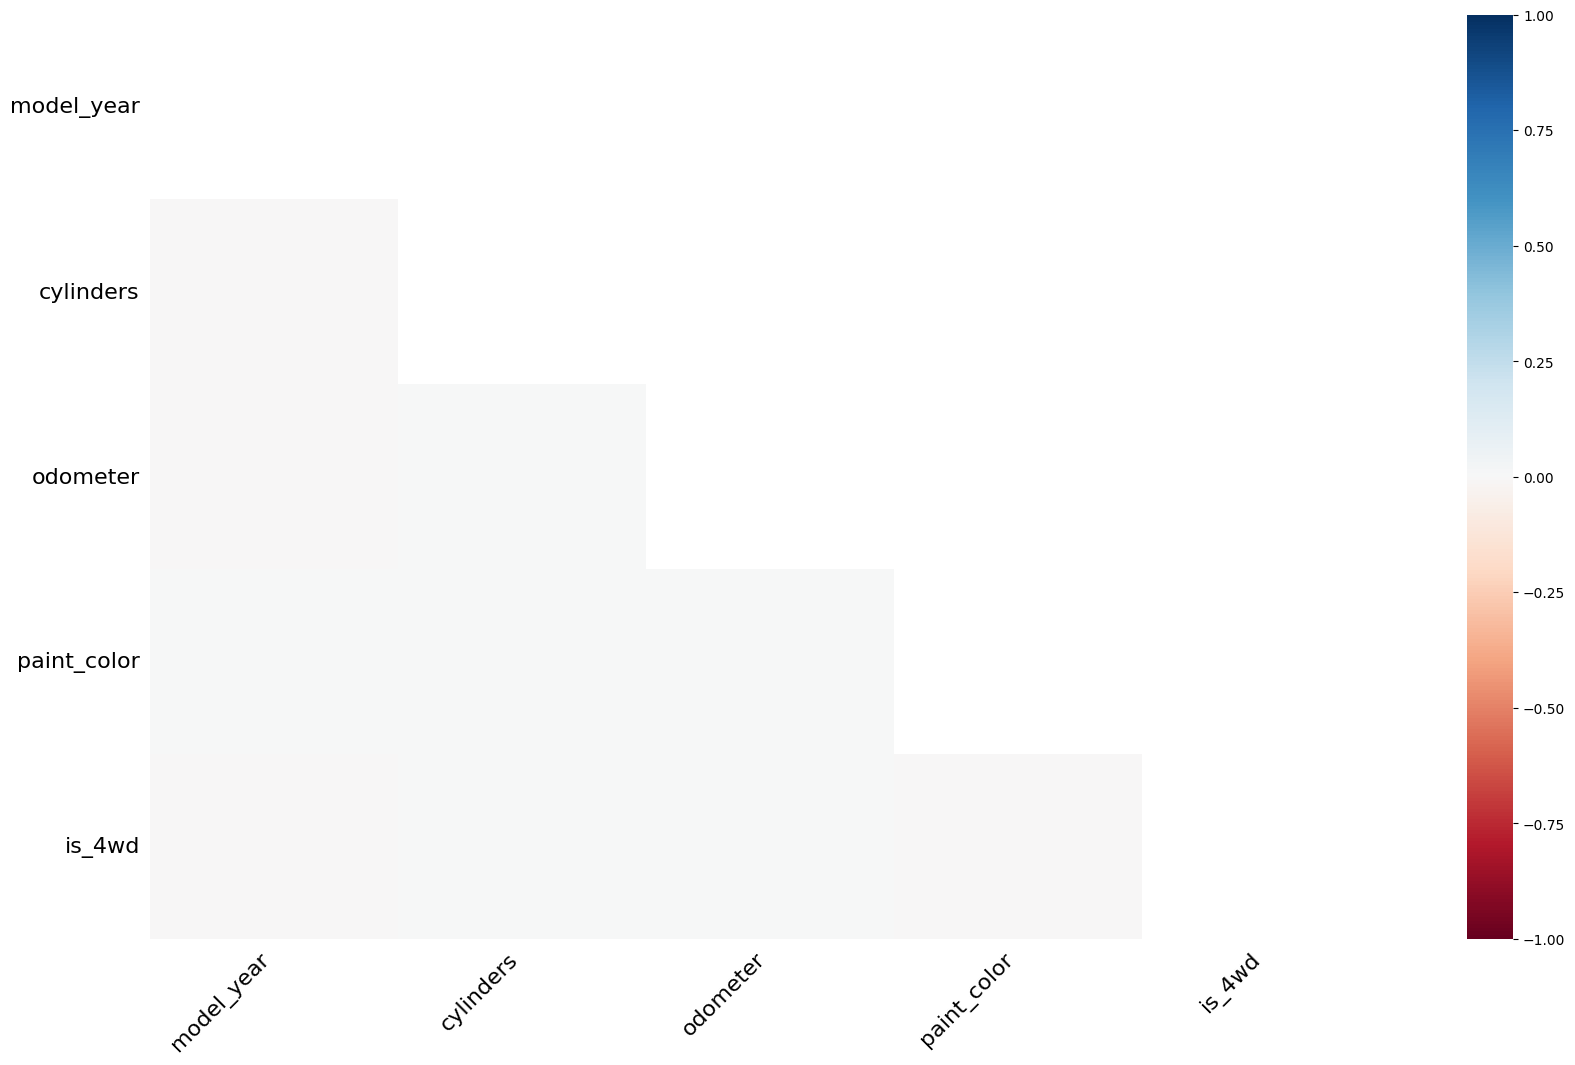

In [161]:
# Identifikasi baris null pada data
msno.heatmap(df2)

**Temuan :**

Kami tidak menemukan adanya suatu pola khusus dalam kemunculan missing value yang dibuktikan dengan tidak adanya korelasi. Hal ini berarti bahwa baris yang hilang bersifat acak.

### **4.4.1. Memperbaiki Nilai Yang Hilang Pada Kolom is_4wd**
Kolom is_4wd (seharusnya) merupakan nilai boolean yang menunjukkan apakah suatu kendaraan memiliki penggerak 4 roda (dimana nilai 1 menunjukkan nilai *True*). Selain persentase nilai baris hilangnya yang paling tinggi (50.4%), masalah lain yang berhasil kami identifikasi yaitu yang berkaitan dengan tipe datanya. Kami terlebih dahulu akan mengobservasi kolom ini untuk menentukan aksi yang paling tepat dalam menangani baris yang hilang tersebut.

In [162]:
# Identifikasi nilai unik pada kolom is_4wd
df2['is_4wd'].unique()

array([ 1., nan])

**Kesimpulan :**

Kami memperoleh temuan yang sangat mengejutkan, dimana kolom tersebut menunjukkan tidak adanya variasi nilai sebagaimana seharusnya karakteristik nilai boolean yang memiliki 2 variasi nilai. Kami meyakini terdapat kesalahan penginputan data yang menyebabkan baris yang seharusnya berisi angka nol (0) secara keliru dipahami sebagai *Null*. Terdapat indikasi kuat yang mengarah kepada problem teknis ketika penginputan dilakukan. Dengan asumsi yang kami coba bangun, selanjutnya kami yakin untuk mengisi nilai yang hilang di kolom is_4wd dengan menganggap nilai yang hilang seharusnya bernilai nol dikarenakan tidak ada alternatif nilai lain ketika suatu kolom memiliki tipe data berupa variabel logis (*boolean*).

In [163]:
# mengisi nilai yang hilang untuk kolom is_4wd
df2['is_4wd'] = df2['is_4wd'].fillna(0)
print(df2.isnull().sum())
print('------------------------------------------')
print(df.isnull().sum())

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64
------------------------------------------
price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


### **4.4.2. Memperbaiki Nilai Yang Hilang Pada Kolom paint_color**
Kolom selanjutnya yang memiliki persentase baris nilai hilang yang cukup tinggi adalah paint_color. Kolom ini memuat identifikasi warna kendaraan yang diiklankan. Sebelum memutuskan aksi yang akan kami ambil untuk menangani nilai yang hilang pada kolom ini, mula - mula kami akan mengidentifikasi pola distribusi nilainya

paint_color
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64



<Axes: xlabel='paint_color'>

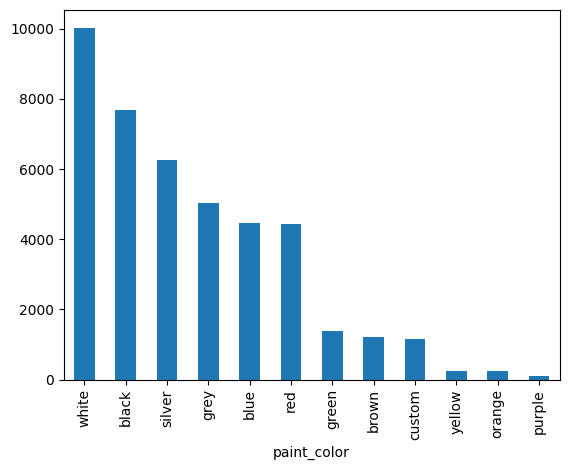

In [164]:
# Munculkan distribusi nilai untuk kolom paint_color
print(df2['paint_color'].value_counts())

print()
df2['paint_color'].value_counts().plot(kind='bar')

**Kesimpulan :**

Sejauh ini kami mengidentifikasi warna terbanyak untuk kendaraan yang diiklankan adalah putih. Artinya kami dapat saja menggunakan pendekatan nilai modus untuk mengisi baris yang hilang pada kolom paint_color sembari mempertahankan bentuk dari pola distribusi nilainya. Namun, alih-alih menggunakan pendekatan ini dan membiarkan proses analisa yang kami lakukan menjadi semakin tidak berdasar, kami lebih mengutamakan preferensi untuk mengelompokkan baris yang hilang dan mengisi nilai tersebut dengan nilai khusus diluar elemen baris yang ada pada kolom.

In [165]:
# Mengisi baris yang hilang di kolom `paint_color` dengan 'not identified'
df2['paint_color'] = df2['paint_color'].fillna(value='not identified')
print(df2.isnull().sum())
print('------------------------------------------')
print(df.isnull().sum())

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64
------------------------------------------
price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [166]:
# Identifikasi kolom dengan nilai yang baru
df2['paint_color'].value_counts()

paint_color
white             10029
not identified     9267
black              7692
silver             6244
grey               5037
blue               4475
red                4421
green              1396
brown              1223
custom             1153
yellow              255
orange              231
purple              102
Name: count, dtype: int64

**Kesimpulan**

Akhirnya, dikarenakan kami tidak dapat menerapkan pendekatan nilai rata-rata untuk mengisi baris null pada baris kolom yang bernilai kategorikal, maka strategi alternatif yang kami gunakan yaitu dengan cara mengelompokkan baris null tersebut menjadi kelompok kategori baru kedalam baris kolom paint_color bernama '*not identified*'

### **4.4.3. Memperbaiki Nilai Yang Hilang Pada Kolom Model_Year**
Kami sebelumnya telah mengidentifikasi baris yang hilang pada kolom model_year sebesar 7.02%. Kami yakin akan kehilangan informasi berharga yang cukup signifikan apabila baris *null* ini dihapus. Untuk itu, kami akan mempertimbangkan untuk mengisi baris *null* pada kolom model_year menggunakan penaksiran dari selisih antara periode tahun ketika kendaraan diiklankan terhadap periode estimasi tahun kepemilikan kendaraan.

In [167]:
# menambahkan kolom year_posted ke dataset
df2['date_posted'] = pd.to_datetime(df2['date_posted'], format=('%Y-%m-%d'))
df2['year_posted'] = df2['date_posted'].dt.year
df2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not identified,1.0,2018-06-23,19,2018
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,not identified,0.0,2019-03-22,9,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2018
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2018
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,2018
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,2018


In [168]:
# menambahkan kolom tahun_kepemilikan_kendaraan yang memuat selisih nilai antara year_posted dan model_year
df2['tahun_kepemilikan_kendaraan'] = df2['year_posted'] - df2['model_year']
df2[df2['tahun_kepemilikan_kendaraan'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,NaN
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28,2018,NaN
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15,2018,NaN
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39,2019,NaN
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24,2018,NaN
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13,2019,NaN
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56,2018,NaN
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37,2018,NaN


**Kesimpulan**

Kami telah menambahkan kolom year_posted dan tahun_kepemilikan_kendaraan. Baris kolom tahun_kepemilikan_kendaraan merupakan selisih antara nilai tahun ketika kendaraan diiklankan terhadap tahun rilis kendaraan. Kolom ini merepresentasikan estimasi periode kepemilikan suatu kendaraan (oleh owner) yang diukur semenjak pertama kali kendaraan dirilis hingga kendaraan tersebut diiklankan.

Kami akan melanjutkan dengan mengidentifikasi berapa jarak tempuh pertahun selama kepemilikan kendaraan. Kami akan menambahkan kolom baru bernama 'miles/years'. Namun, sebelum itu kami akan memeriksa apakah terdapat baris dimana tahun kepemilikan kendaraan < 1 tahun

In [169]:
# menghitung jumlah baris dimana tahun kepemilikan kendaraan < 1 tahun
print('TERDAPAT SEBANYAK', len(df2[df2['tahun_kepemilikan_kendaraan'] < 1]), 'KENDARAAN YANG MASA KEPEMILIKANNYA DIBAWAH 1 TAHUN')

TERDAPAT SEBANYAK 2128 KENDARAAN YANG MASA KEPEMILIKANNYA DIBAWAH 1 TAHUN


In [170]:
# menetapkan kondisi khusus dalam perhitungan kolom miles/years
df2[(~ df2['odometer'].isnull()) & (df2['tahun_kepemilikan_kendaraan'] >= 1)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not identified,1.0,2018-06-23,19,2018,7.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,6.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,2.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2018,4.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2018,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,0.0,2018-08-10,63,2018,13.0
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2018,5.0
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2018,16.0
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,2018,9.0


**Kesimpulan**

Kolom miles/years yang akan kami tambahkan ke dataset merupakan hasil kalkulasi pembagian antara kolom odometer terhadap kolom tahun_kepemilikan_kendaraan (yang telah kami tambahkan di langkah sebelumnya), dengan menerapkan kondisi yaitu hanya untuk baris odometer yang tidak null dan tahun kepemilikan kendaraan yang lebih besar dari sama dengan 1 tahun. Dengan menetapkan pertimbangan ini, artinya hasil kalkulasi kami untuk kolom miles/years masih akan menyisakan sekitar 12.774 baris null, yaitu sejumlah baris yang tidak memenuhi kondisi.

In [171]:
# menambahkan kolom miles/year kedalam dataset
df2['miles/years'] = (df2['odometer'])/(df2['tahun_kepemilikan_kendaraan']). where((~ df2['odometer'].isnull()) & (df2['tahun_kepemilikan_kendaraan'] >= 1))
df2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not identified,1.0,2018-06-23,19,2018,7.0,20714.285714
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,NaN,NaN
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,not identified,0.0,2019-03-22,9,2019,16.0,NaN
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,2.0,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2018,5.0,17627.200000
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2018,16.0,11343.750000
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,2018,9.0,14222.222222
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,2018,5.0,27914.600000


In [172]:
# mengidentifikasi jumlah baris null untuk kolom miles/years
print(df2.isnull().sum())

price                              0
model_year                      3619
model                              0
condition                          0
cylinders                       5260
fuel                               0
odometer                        7892
transmission                       0
type                               0
paint_color                        0
is_4wd                             0
date_posted                        0
days_listed                        0
year_posted                        0
tahun_kepemilikan_kendaraan     3619
miles/years                    12774
dtype: int64


**Kesimpulan**

Seperti yang telah kami prediksi, 12.774 baris null untuk kolom miles/years. Selanjutnya kami akan mulai sejumlah tahapan untuk mengisi baris null pada kolom model_year

In [173]:
# Menghitung nilai median dari kolom miles/years untuk masing-masing model kendaraan
med_model = pd.pivot_table(df2, index='model', values='miles/years', aggfunc = 'median').reset_index()
med_model.columns = ['model', 'miles/years_per_model']
med_model.sort_values('model', ascending=False)

,model,miles/years_per_model
98,volkswagen passat,13288.066667
97,volkswagen jetta,15144.000000
96,toyota tundra,15031.625000
95,toyota tacoma,15428.571429
94,toyota sienna,14771.333333
...,...,...
4,chevrolet camaro,10251.812500
3,cadillac escalade,14117.910714
2,buick enclave,18731.888889
1,bmw x5,12038.461538


In [174]:
# Menggabungkan dataset avg_model ke dataset asli (df2)
df2 = df2.merge(med_model, on='model', how='left')

# Menghapus baris kolom miles/years_per_model apabila kolom odometer null
df2.loc[df2['odometer'].isnull(), 'miles/years_per_model'] = np.nan

**Kesimpulan**

Seharusnya kami akan menemukan simetrisitas baris null antara kolom odometer dan miles/years_per_model

In [175]:
# identifikasi baris null kolom odometer
df2[df2['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,not identified,0.0,2019-03-22,9,2019,16.0,NaN,NaN
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111,2018,5.0,NaN,NaN
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39,2018,14.0,NaN,NaN
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40,2018,9.0,NaN,NaN
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,not identified,0.0,2018-07-26,43,2018,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,not identified,1.0,2019-01-25,69,2019,8.0,NaN,NaN
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31,2018,6.0,NaN,NaN
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51,2018,7.0,NaN,NaN
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,not identified,0.0,2018-11-24,89,2018,3.0,NaN,NaN


In [176]:
# identifikasi baris null kolom miles/years_per_model
df2[df2['miles/years_per_model'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,not identified,0.0,2019-03-22,9,2019,16.0,NaN,NaN
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111,2018,5.0,NaN,NaN
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39,2018,14.0,NaN,NaN
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40,2018,9.0,NaN,NaN
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,not identified,0.0,2018-07-26,43,2018,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,not identified,1.0,2019-01-25,69,2019,8.0,NaN,NaN
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31,2018,6.0,NaN,NaN
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51,2018,7.0,NaN,NaN
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,not identified,0.0,2018-11-24,89,2018,3.0,NaN,NaN


**Kesimpulan**

Ini yang kami maksud dengan simetrisitas antara baris kolom odometer dan miles/years_per_model. Setelahnya proses untuk mengganti baris null pada kolom model_year akan semakin mudah

In [177]:
print(df2.isnull().sum())

price                              0
model_year                      3619
model                              0
condition                          0
cylinders                       5260
fuel                               0
odometer                        7892
transmission                       0
type                               0
paint_color                        0
is_4wd                             0
date_posted                        0
days_listed                        0
year_posted                        0
tahun_kepemilikan_kendaraan     3619
miles/years                    12774
miles/years_per_model           7892
dtype: int64


In [178]:
# Identifikasi baris nilai yang hilang untuk kolom model_year
df2[df2['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,NaN,NaN,15692.307692
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28,2018,NaN,NaN,15680.926573
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15,2018,NaN,NaN,15692.307692
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39,2019,NaN,NaN,15692.307692
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60,2018,NaN,NaN,13858.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24,2018,NaN,NaN,14791.113636
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13,2019,NaN,NaN,14887.000000
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56,2018,NaN,NaN,15692.307692
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37,2018,NaN,NaN,20300.000000


**Kesimpulan**

Kami dapat mengisi baris yang hilang pada kolom model_year (3.619 baris) menggunakan nilai dari hasil kalkulasi atas selisih estimasi periode kepemilikan kendaraan terhadap tahun ketika kendaraan diposting/diiklankan. Namun, kami juga menyadari bahwa tidak seluruh baris null akan terisi untuk kolom tersebut dikarenakan masih adanya *missing value* pada kolom odometer dan miles/years_per_model. Meskipun tentu saja kami yakin jumlah tersebut sangat kecil dibandingkan keseluruhan dataset. Jadi kami akan mengidentifikasi berapa jumlah baris kolom model_year yang masih tetap akan null tersebut :

In [179]:
still_null = df2[(df2['model_year'].isnull()) & (df2['odometer'].isnull()) & (df2['miles/years_per_model'].isnull())]
print('Tentu saja hanya sebanyak', len(still_null), 'baris data. Jumlah yang sangat sedikit')

Tentu saja hanya sebanyak 549 baris data. Jumlah yang sangat sedikit


In [180]:
# Mengisi baris null pada kolom model_year
df2['model_year'] = df2['model_year'].fillna((df2['year_posted'] - (df2['odometer']/df2['miles/years_per_model'])), inplace=False)

In [181]:
df2[df2['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73,2018,NaN,NaN,NaN
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,0.0,2018-05-13,57,2018,NaN,NaN,NaN
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,0.0,2019-01-14,50,2019,NaN,NaN,NaN
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,not identified,0.0,2018-08-09,29,2018,NaN,NaN,NaN
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,not identified,0.0,2018-10-22,37,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35,2018,NaN,NaN,NaN
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,0.0,2018-12-09,23,2018,NaN,NaN,NaN
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,0.0,2018-10-16,75,2018,NaN,NaN,NaN
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-16,83,2019,NaN,NaN,NaN


In [182]:
# ganti semua nilai NaN dengan -100
df2['model_year'] = df2['model_year'].fillna(-100)

# Konversikan tipe datanya
df2['model_year'] = df2['model_year'].astype(int)


In [183]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   price                        51525 non-null  int64         
 1   model_year                   51525 non-null  int64         
 2   model                        51525 non-null  object        
 3   condition                    51525 non-null  object        
 4   cylinders                    46265 non-null  float64       
 5   fuel                         51525 non-null  object        
 6   odometer                     43633 non-null  float64       
 7   transmission                 51525 non-null  object        
 8   type                         51525 non-null  object        
 9   paint_color                  51525 non-null  object        
 10  is_4wd                       51525 non-null  float64       
 11  date_posted                  51525 non-nu

In [184]:
# identifikasi nilai -100 yang sama dengan null
df2[df2['model_year'] == -100]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model
159,23300,-100,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73,2018,NaN,NaN,NaN
260,14975,-100,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,0.0,2018-05-13,57,2018,NaN,NaN,NaN
370,4700,-100,kia soul,good,NaN,gas,NaN,manual,sedan,white,0.0,2019-01-14,50,2019,NaN,NaN,NaN
586,26000,-100,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,not identified,0.0,2018-08-09,29,2018,NaN,NaN,NaN
659,8400,-100,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,not identified,0.0,2018-10-22,37,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,-100,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35,2018,NaN,NaN,NaN
51222,1000,-100,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,0.0,2018-12-09,23,2018,NaN,NaN,NaN
51257,6500,-100,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,0.0,2018-10-16,75,2018,NaN,NaN,NaN
51295,3850,-100,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-16,83,2019,NaN,NaN,NaN


**Kesimpulan**

Kami telah berhasil mengisi setidaknya 85% baris null pada kolom model_year menggunakan nilai estimasi yang cukup otentik. Sisanya, sebanyak 549 baris data yang masih null (yang sebelumnya telah kami notasikan dengan nilai -100) akan kami pertimbangkan untuk dihilangkan mengingat persentase jumlahnya < 3%

In [185]:
df2 = df2.loc[df2['model_year'] > 0]

In [186]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50976 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   price                        50976 non-null  int64         
 1   model_year                   50976 non-null  int64         
 2   model                        50976 non-null  object        
 3   condition                    50976 non-null  object        
 4   cylinders                    45775 non-null  float64       
 5   fuel                         50976 non-null  object        
 6   odometer                     43633 non-null  float64       
 7   transmission                 50976 non-null  object        
 8   type                         50976 non-null  object        
 9   paint_color                  50976 non-null  object        
 10  is_4wd                       50976 non-null  float64       
 11  date_posted                  50976 non-null  d

### **4.4.4. Memperbaiki Nilai Yang Hilang Pada Kolom Cylinders**
Kolom cylinders mereperesentasikan jumlah silinder kendaraan yang dibedakan untuk setiap kendaraan. Kolom ini memiliki baris null dengan persentase sebesar 10.2% (5.260). Untuk tingkat persentase yang cukup signifikan ini, kami mempertimbangkan untuk mengisi nilai baris yang null menggunakan estimasi rata-rata (median) cylinders untuk masing-masing tipe kendaraan.

In [187]:
df2.isnull().sum()

price                              0
model_year                         0
model                              0
condition                          0
cylinders                       5201
fuel                               0
odometer                        7343
transmission                       0
type                               0
paint_color                        0
is_4wd                             0
date_posted                        0
days_listed                        0
year_posted                        0
tahun_kepemilikan_kendaraan     3070
miles/years                    12225
miles/years_per_model           7343
dtype: int64

<Axes: >

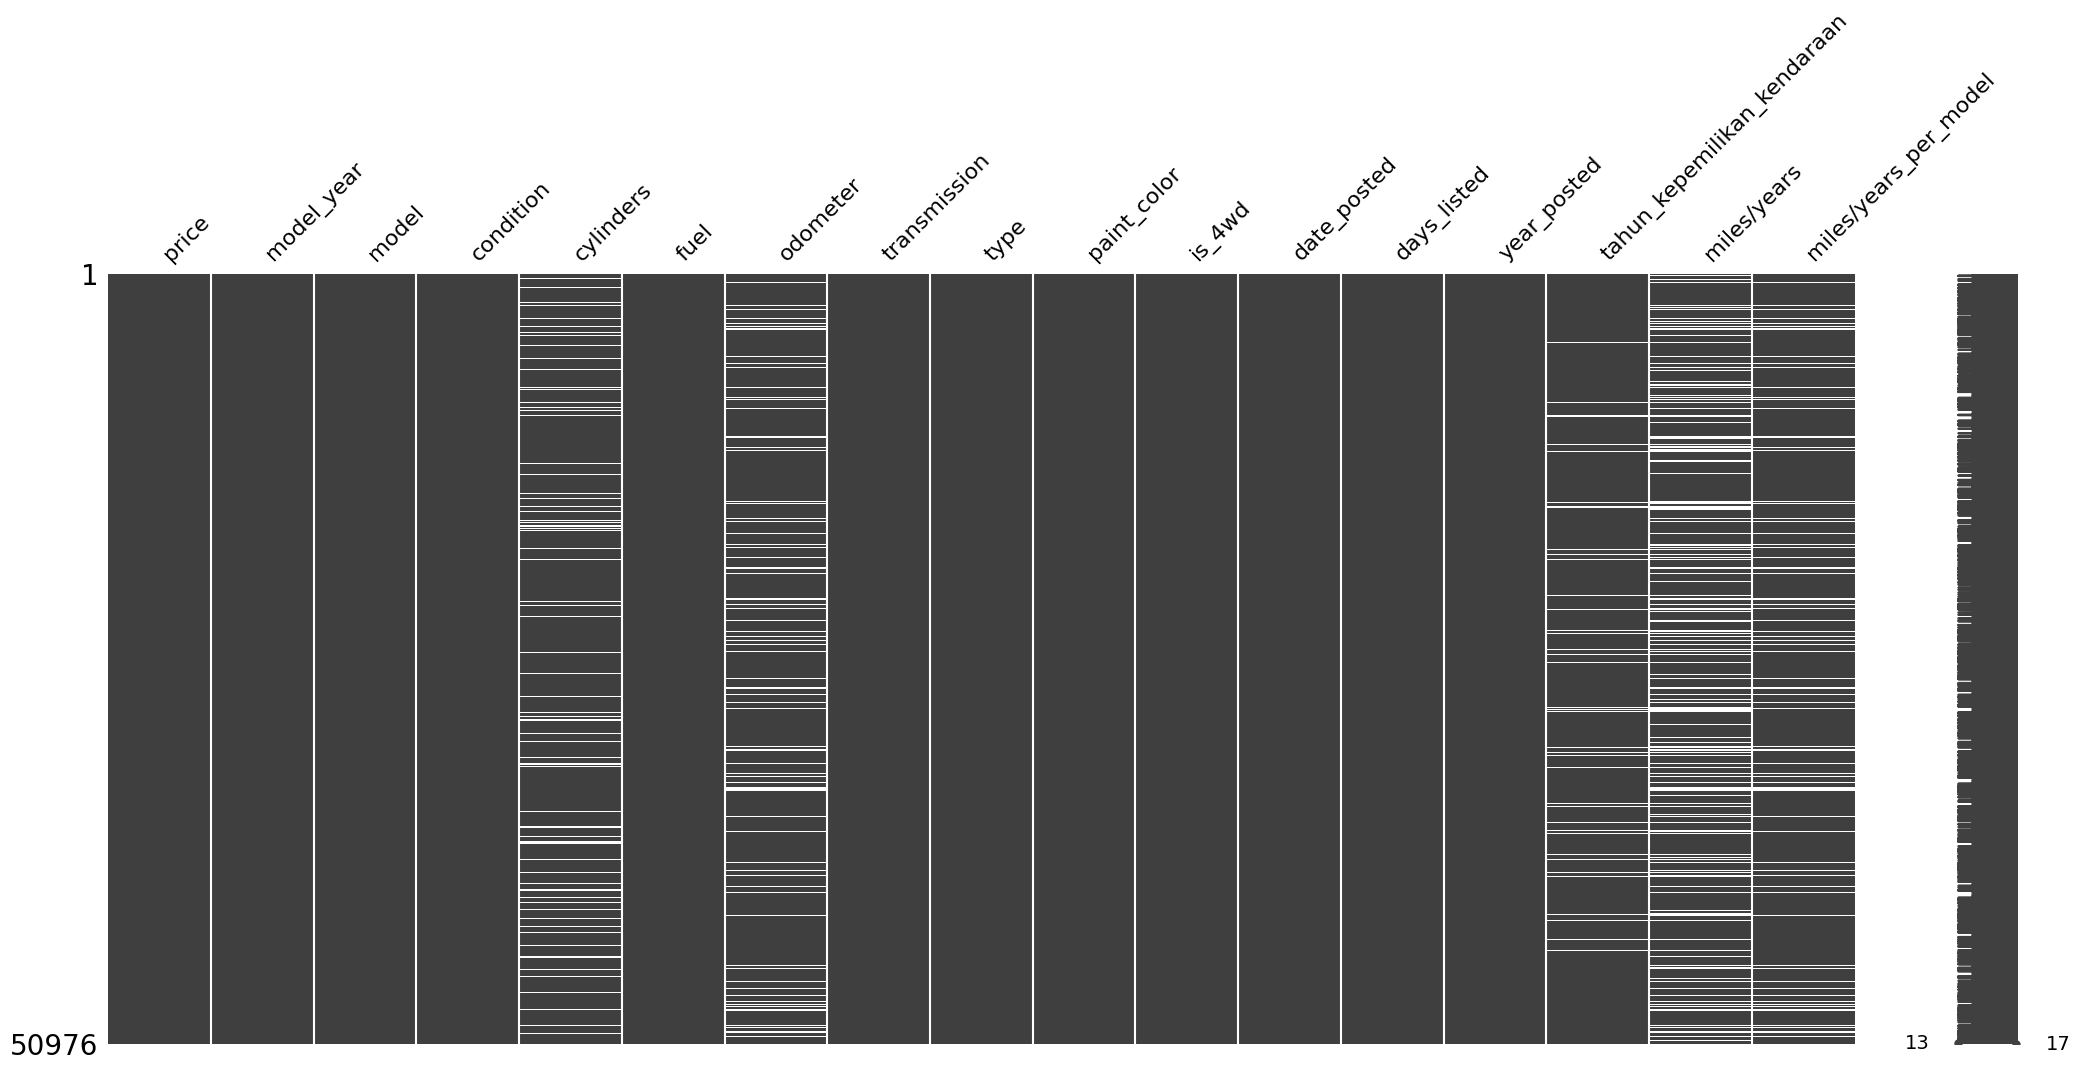

In [188]:
# identifikasi pola pada baris null
msno.matrix(df2)

In [189]:
# nilai median cylinders per model kendaraan
avg_per_model = df2.pivot_table(index='model', values='cylinders', aggfunc='median').reset_index()
avg_per_model.sort_values('model', ascending=True).head(10)

,model,cylinders
0,acura tl,6.0
1,bmw x5,6.0
2,buick enclave,6.0
3,cadillac escalade,8.0
4,chevrolet camaro,6.0
5,chevrolet camaro lt coupe 2d,6.0
6,chevrolet colorado,5.0
7,chevrolet corvette,8.0
8,chevrolet cruze,4.0
9,chevrolet equinox,4.0


In [190]:
df2.dtypes

price                                   int64
model_year                              int64
model                                  object
condition                              object
cylinders                             float64
fuel                                   object
odometer                              float64
transmission                           object
type                                   object
paint_color                            object
is_4wd                                float64
date_posted                    datetime64[ns]
days_listed                             int64
year_posted                             int32
tahun_kepemilikan_kendaraan           float64
miles/years                           float64
miles/years_per_model                 float64
dtype: object

In [191]:
# Mengisi baris null pada kolom cylinders
# menghitung nilai median cylinders per model kendaraan
# Mengonversi kolom 'cylinders' menjadi tipe data numerik dengan mengabaikan nilai non-numerik
df2['cylinders'] = pd.to_numeric(df2['cylinders'], errors='coerce')

# Menghitung nilai median cylinders per model kendaraan
dict_cylinders = df2.groupby('model')['cylinders'].median()

# mengidentifikasi data nilai median cylinders kedalam baris kolom cylinders yang null
df2.loc[df2['cylinders'].isnull(), 'model'].map(dict_cylinders)

# Menginput data nilai median cylinders kedalam baris kolom cylinders yang null
df2.loc[df2['cylinders'].isnull(), 'cylinders'] = df2.loc[df2['cylinders'].isnull(), 'model'].map(dict_cylinders)

In [192]:
# mengidentifikasi baris kolom cylinders yang null
df2['cylinders'].isnull().sum()

0

In [193]:
df2.isnull().sum()

price                              0
model_year                         0
model                              0
condition                          0
cylinders                          0
fuel                               0
odometer                        7343
transmission                       0
type                               0
paint_color                        0
is_4wd                             0
date_posted                        0
days_listed                        0
year_posted                        0
tahun_kepemilikan_kendaraan     3070
miles/years                    12225
miles/years_per_model           7343
dtype: int64

### **4.4.5. Memperbaiki Nilai Yang Hilang Pada Kolom Odometer**
Kolom odometer merepresentasikan jarak yang telah ditempuh kendaraan saat iklan ditayangkan. Kolom ini memiliki 15.3% baris nilai yang hilang. Sebagai konsultan analis data, kami yakin bahwa nilai odometer berkaitan erat dengan aspek tahun rilis kendaraan (model_year) dan kondisi kendaraan ketika dijual (condition). Jadi kami akan mengisi baris yang hilang pada kolom odometer menggunakan metode *central tendency* (tergantung distribusi data) dengan mempertimbangkan aspek tahun rilis dan kondisi kendaraan.

Mula - mula kami akan membuktikan hipotesa awal kami yaitu bahwa bahwa nilai odometer berkaitan erat dengan aspek tahun rilis kendaraan (model_year) dan kondisi kendaraan ketika dijual (condition) menggunakan metriks korelasi. Selanjutnya kami akan mencermati pola dispersi nilai odometer untuk menentukan pendekatan nilai pemusatan yang relevan untuk digunakan.

In [194]:
# menambahkan kolom baru ke dataset 'condition_likert' yang memuat nilai baris berupa skala likert dari kolom 'condition'

dict_cond = {
    'new' : 5,
    'like new' : 4,
    'excellent' : 3,
    'good' : 2,
    'fair' : 1,
    'salvage' : 0
}

dict_cond

df2['condition_likert'] = df2['condition'].map(dict_cond)

In [197]:
# Identifikasi dataset
df2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not identified,1.0,2018-06-23,19,2018,7.0,20714.285714,12038.461538,2
1,25500,2012,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,NaN,NaN,15692.307692,2
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,6.0,18333.333333,15657.250000,4
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,not identified,0.0,2019-03-22,9,2019,16.0,NaN,NaN,1
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,2.0,40451.500000,19020.250000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2018,5.0,17627.200000,14197.744048,4
51521,2700,2002,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2018,16.0,11343.750000,13333.333333,0
51522,3950,2009,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,2018,9.0,14222.222222,15657.250000,3
51523,7455,2013,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,2018,5.0,27914.600000,14796.115385,2


In [202]:
# Identifikasi hubungan antara kolom odometer, model_year dan condition menggunakan metriks korelasi
# Drop kolom 'model' dan 'condition' sebelum menghitung korelasi
columns_to_exclude = ['model', 'condition']
numerical_columns = df2.drop(columns=columns_to_exclude).select_dtypes(include=['number'])

# Hitung korelasi
correlation_matrix = numerical_columns.corr()

# Tampilkan matriks korelasi
correlation_matrix

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert
price,1.000000,0.426912,0.300053,-0.420299,0.315390,-0.001273,0.004658,-0.427448,0.235507,0.014424,0.221169
model_year,0.426912,1.000000,-0.145630,-0.494651,0.040167,-0.004790,0.012581,-0.997310,0.489761,0.311195,0.280343
cylinders,0.300053,-0.145630,1.000000,0.090262,0.406990,0.002314,-0.000419,0.146503,-0.032472,-0.114888,-0.065881
odometer,-0.420299,-0.494651,0.090262,1.000000,0.036267,0.003804,-0.007356,0.472367,0.145126,0.006728,-0.296445
is_4wd,0.315390,0.040167,0.406990,0.036267,1.000000,0.002670,-0.001996,-0.043431,0.056970,0.038059,0.013062
days_listed,-0.001273,-0.004790,0.002314,0.003804,0.002670,1.000000,0.010502,0.006422,-0.004043,0.002456,-0.002850
year_posted,0.004658,0.012581,-0.000419,-0.007356,-0.001996,0.010502,1.000000,0.065228,-0.119024,-0.000286,0.003417
tahun_kepemilikan_kendaraan,-0.427448,-0.997310,0.146503,0.472367,-0.043431,0.006422,0.065228,1.000000,-0.498274,-0.309245,-0.281486
miles/years,0.235507,0.489761,-0.032472,0.145126,0.056970,-0.004043,-0.119024,-0.498274,1.000000,0.232444,0.078144
miles/years_per_model,0.014424,0.311195,-0.114888,0.006728,0.038059,0.002456,-0.000286,-0.309245,0.232444,1.000000,0.020222


**Kesimpulan :**

Hipotesa kami terbukti, dimana kami berhasil mengidentifikasi adanya korelasi negatif yang cukup signifikan antara kolom odometer-model_years (-0.50) dan odomoter-condition_likert (-0.30). Kami dapat melanjutkan dengan mengidentifikasi seperti apa dispersi data odomoeter.

In [203]:
# Munculkan kolom odometer yang memiliki baris null
df2[df2['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,not identified,0.0,2019-03-22,9,2019,16.0,NaN,NaN,1
15,17990,2013,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111,2018,5.0,NaN,NaN,3
23,7500,2004,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39,2018,14.0,NaN,NaN,2
24,3950,2009,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40,2018,9.0,NaN,NaN,3
25,11499,2017,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,not identified,0.0,2018-07-26,43,2018,1.0,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,not identified,1.0,2019-01-25,69,2019,8.0,NaN,NaN,3
51507,29500,2012,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31,2018,6.0,NaN,NaN,2
51516,8999,2011,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51,2018,7.0,NaN,NaN,2
51519,11750,2015,honda accord,excellent,4.0,gas,NaN,automatic,coupe,not identified,0.0,2018-11-24,89,2018,3.0,NaN,NaN,3


               odometer  count
0   (99000.0, 198000.0]  21640
1     (-990.0, 99000.0]  17833
2  (198000.0, 297000.0]   3825
3  (297000.0, 396000.0]    285
4  (396000.0, 495000.0]     24
5  (495000.0, 594000.0]      9
6  (792000.0, 891000.0]      7
7  (693000.0, 792000.0]      4
8  (891000.0, 990000.0]      4
9  (594000.0, 693000.0]      2




/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


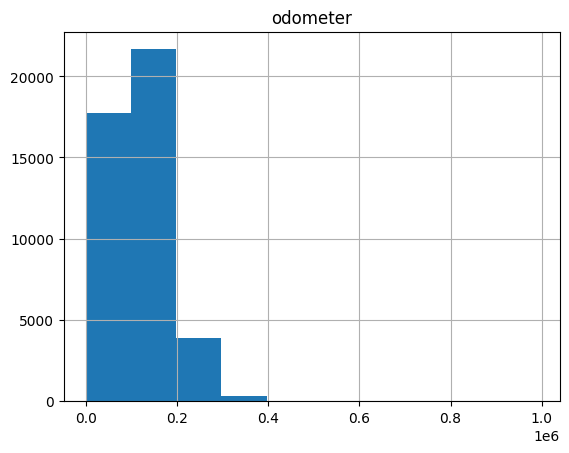

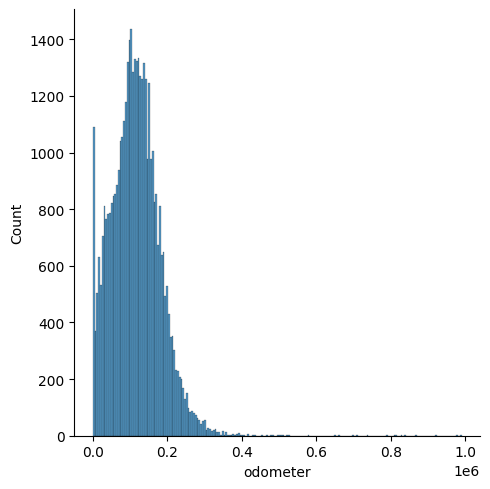

In [210]:
# memunculkan data yang menyusun histogram
print(pd.cut(df2['odometer'], bins=10).value_counts().to_frame().reset_index())
print()

# identifikasi pola histogramnya
df2.hist('odometer')
print()

# identifikasi pola distribusi datanya
print(sns.displot(df2['odometer']))

In [211]:
# Identifikasi hasil uji kolmogorov smirnov
print(kstest(df2['odometer'].dropna(), 'norm'))

KstestResult(statistic=0.9950493317565137, pvalue=0.0, statistic_location=5.0, statistic_sign=-1)


**Kesimpulan :**

Grafik menunjukkan adanya pola skewness positif yang kuat terhadap dispersi nilai pada kolom odometer. Hasil uji kolmogorov smirnov dengan *confidence level* 95% memperkuat bukti bahwa data tidak berdistribusi normal dikarenakan nilai pvalue=0.0 < 0.05 (signifikansi alfa).
Hasil pengujian ini dapat digunakan sebagai dasar kami untuk menetapkan pendekatan median sebagai nilai pemusatan yang relevan untuk digunakan dalam analisa lebih lanjut.

Kami akan melanjutkan ke tahap pengisian baris null pada kolom odometer menggunakan pendekatan nilai median odometer berdasarkan tahun model dan kondisi kendaraan. Jadi mula-mula kami akan mengidentifikasi adanya kemungkinan masalah yang dapat muncul seperti baris nilai kolom odometer yang tetap *null* bahkan setelah kami menangani *missing value*-nya oleh karena suatu hal.

In [212]:
# munculkan variabel df_tmp_daily; pengelompokan nilai median odometer berdasarkan tahun model dan kondisi kendaraan
df_tmp_daily = pd.pivot_table(df2,index=['model_year','condition'], values='odometer', aggfunc = 'median').reset_index()
df_tmp_daily.sort_values('model_year', ascending=True).head(10)

,model_year,condition,odometer
0,1908,good,169328.0
1,1936,excellent,30000.0
2,1937,excellent,241210.0
3,1948,like new,4000.0
4,1949,good,1800.0
5,1954,excellent,3565.0
6,1955,excellent,47180.0
7,1958,excellent,3184.0
8,1958,good,62799.0
9,1960,excellent,16000.0


In [213]:
# Identifikasi perbedaan jumlah nilai unique kolom model_year untuk 2 dataset
print('jumlah nilai unique untuk baris kolom model_year di dataset asli sebanyak :', df2['model_year'].nunique())
print()
print('jumlah nilai unique untuk baris kolom model_year di dataset df_tmp_daily sebanyak :', df_tmp_daily['model_year'].nunique())

jumlah nilai unique untuk baris kolom model_year di dataset asli sebanyak : 69

jumlah nilai unique untuk baris kolom model_year di dataset df_tmp_daily sebanyak : 68


In [214]:
# identifikasi baris dengan tahun model kendaran '1929' pada kolom model_year untuk dataset asli
df2[df2['model_year'] == 1929]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert
45694,18000,1929,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59,2018,89.0,NaN,NaN,2


In [215]:
# identifikasi baris dengan tahun model 1929 pada kolom model_year untuk df_tmp_daily
df_tmp_daily[df_tmp_daily['model_year'] == 1929]

,model_year,condition,odometer


**Kesimpulan**

Jelas sekali bahwa ada perbedaan jumlah nilai unique pada baris kolom model_year di 2 dataset ini. Terdapat 1 nilai yang hilang yaitu untuk model kendaraan tahun 1929 yang disebabkan karena dataset kami hanya memiliki 1 kendaraan di tahun tersebut dan secara kebetulan baris kolom odometer-nya *null*. Hal ini menyebabkan pendekatan metode *central tendency* tidak akan berfungsi, sehingga artinya baris nilai dimana model kendaraan 1929 tidak memungkinkan untuk dapat kami tangani permasalahan *missing value*nya. Namun sebagai pertimbangan, apabila permasalahan ini hanya terjadi untuk 1 baris data saja, maka kami memiliki 2 alternatif cara untuk mengisi baris yang bermasalah tersebut, yaitu apakah dengan mengisinya secara manual ataupun menghapus baris tersebut.

In [216]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50976 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   price                        50976 non-null  int64         
 1   model_year                   50976 non-null  int64         
 2   model                        50976 non-null  object        
 3   condition                    50976 non-null  object        
 4   cylinders                    50976 non-null  float64       
 5   fuel                         50976 non-null  object        
 6   odometer                     43633 non-null  float64       
 7   transmission                 50976 non-null  object        
 8   type                         50976 non-null  object        
 9   paint_color                  50976 non-null  object        
 10  is_4wd                       50976 non-null  float64       
 11  date_posted                  50976 non-null  d

In [217]:
# Munculkan variabel df_all yang memuat pengelompokan simetris terhadap seluruh nilai dari kolom model_year dan condition
df_model = df2[['model_year', 'odometer']].groupby('model_year').median().reset_index()

list_tmp = []

for i in df_model['model_year'].to_list():
    for j in dict_cond.keys():
        list_tmp.append((i, j))

df_all = pd.DataFrame(list_tmp, columns = ['model_year', 'condition'])
df_all

,model_year,condition
0,1908,new
1,1908,like new
2,1908,excellent
3,1908,good
4,1908,fair
...,...,...
409,2019,like new
410,2019,excellent
411,2019,good
412,2019,fair


In [218]:
# Lakukan penggabungan antara variabel df_all dengan variabel df_tmp_daily; terdapat tambahan kolom odometer
df_merge = df_all.merge(df_tmp_daily, on=['model_year', 'condition'], how='left')
df_merge

,model_year,condition,odometer
0,1908,new,NaN
1,1908,like new,NaN
2,1908,excellent,NaN
3,1908,good,169328.0
4,1908,fair,NaN
...,...,...,...
409,2019,like new,12606.0
410,2019,excellent,14410.0
411,2019,good,18521.0
412,2019,fair,NaN


In [219]:
# Lakukan penggabungan akhir yaitu antara variabel df_merge dengan variabel df_model
df_merge = df_merge.merge(df_model, on='model_year', how='left')
df_merge

,model_year,condition,odometer_x,odometer_y
0,1908,new,NaN,169328.0
1,1908,like new,NaN,169328.0
2,1908,excellent,NaN,169328.0
3,1908,good,169328.0,169328.0
4,1908,fair,NaN,169328.0
...,...,...,...,...
409,2019,like new,12606.0,14058.0
410,2019,excellent,14410.0,14058.0
411,2019,good,18521.0,14058.0
412,2019,fair,NaN,14058.0


In [220]:
# mengisi baris odometer_x yang null dengan baris odometer_y; mengabaikan nilai baris odometer_x jika telah terisi
df_merge.loc[df_merge['odometer_x'].isnull(), 'odometer_x'] = df_merge.loc[df_merge['odometer_x'].isnull(), 'odometer_y']


In [221]:
df_merge.tail(10)

,model_year,condition,odometer_x,odometer_y
404,2018,excellent,23373.0,20101.0
405,2018,good,20297.0,20101.0
406,2018,fair,73095.0,20101.0
407,2018,salvage,23810.5,20101.0
408,2019,new,151.0,14058.0
409,2019,like new,12606.0,14058.0
410,2019,excellent,14410.0,14058.0
411,2019,good,18521.0,14058.0
412,2019,fair,14058.0,14058.0
413,2019,salvage,9621.0,14058.0


In [222]:
# mengganti nama kolom odometer_x menjadi nilai_odometer_null
df_merge = df_merge[['model_year', 'condition', 'odometer_x']]
df_merge.columns = ['model_year', 'condition', 'nilai_odometer_null']
df_merge.head(20)

,model_year,condition,nilai_odometer_null
0,1908,new,169328.0
1,1908,like new,169328.0
2,1908,excellent,169328.0
3,1908,good,169328.0
4,1908,fair,169328.0
5,1908,salvage,169328.0
6,1929,new,NaN
7,1929,like new,NaN
8,1929,excellent,NaN
9,1929,good,NaN


In [223]:
df_merge[(df_merge['model_year'] == 1963) & (df_merge['condition'] == 'fair')]

,model_year,condition,nilai_odometer_null
76,1963,fair,40487.0


In [224]:
# gabungkan dataset asli (df2) dengan dataset df_merge
df2 = df2.merge(df_merge, on=['model_year', 'condition'], how='inner')
df2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert,nilai_odometer_null
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not identified,1.0,2018-06-23,19,2018,7.0,20714.285714,12038.461538,2,127346.0
1,3300,2011,kia soul,good,4.0,gas,188963.0,manual,SUV,black,0.0,2019-02-16,71,2019,8.0,23620.375000,20121.200000,2,127346.0
2,9599,2011,chevrolet camaro,good,6.0,gas,100680.0,manual,coupe,silver,0.0,2018-10-26,18,2018,7.0,14382.857143,10251.812500,2,127346.0
3,4900,2011,nissan sentra,good,4.0,gas,116000.0,automatic,sedan,silver,0.0,2018-11-30,19,2018,7.0,16571.428571,16384.098214,2,127346.0
4,12990,2011,ford expedition,good,8.0,gas,124775.0,automatic,SUV,custom,1.0,2018-06-11,50,2018,7.0,17825.000000,14372.333333,2,127346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50971,18000,1929,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59,2018,89.0,NaN,NaN,2,NaN
50972,22300,2003,chevrolet corvette,new,8.0,gas,NaN,manual,convertible,black,0.0,2018-11-08,23,2018,15.0,NaN,NaN,5,163991.0
50973,3800,1984,honda accord,new,4.0,gas,121000.0,manual,sedan,blue,0.0,2019-01-05,162,2019,35.0,3457.142857,13720.779221,5,121000.0
50974,5000,1986,chevrolet corvette,salvage,8.0,gas,100.0,automatic,coupe,black,0.0,2018-08-18,22,2018,32.0,3.125000,2990.631579,0,100.0


In [225]:
df2[~df2['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert,nilai_odometer_null
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not identified,1.0,2018-06-23,19,2018,7.0,20714.285714,12038.461538,2,127346.0
1,3300,2011,kia soul,good,4.0,gas,188963.0,manual,SUV,black,0.0,2019-02-16,71,2019,8.0,23620.375000,20121.200000,2,127346.0
2,9599,2011,chevrolet camaro,good,6.0,gas,100680.0,manual,coupe,silver,0.0,2018-10-26,18,2018,7.0,14382.857143,10251.812500,2,127346.0
3,4900,2011,nissan sentra,good,4.0,gas,116000.0,automatic,sedan,silver,0.0,2018-11-30,19,2018,7.0,16571.428571,16384.098214,2,127346.0
4,12990,2011,ford expedition,good,8.0,gas,124775.0,automatic,SUV,custom,1.0,2018-06-11,50,2018,7.0,17825.000000,14372.333333,2,127346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50969,3200,2006,chevrolet trailblazer,new,8.0,gas,158380.0,automatic,SUV,black,1.0,2019-03-13,41,2019,13.0,12183.076923,11797.666667,5,158380.0
50970,8995,1989,chevrolet corvette,like new,8.0,gas,119213.0,automatic,coupe,grey,0.0,2018-11-27,16,2018,29.0,4110.793103,2990.631579,4,119213.0
50973,3800,1984,honda accord,new,4.0,gas,121000.0,manual,sedan,blue,0.0,2019-01-05,162,2019,35.0,3457.142857,13720.779221,5,121000.0
50974,5000,1986,chevrolet corvette,salvage,8.0,gas,100.0,automatic,coupe,black,0.0,2018-08-18,22,2018,32.0,3.125000,2990.631579,0,100.0


In [226]:
df2[df2['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert,nilai_odometer_null
9,8950,2011,toyota camry,good,6.0,gas,NaN,automatic,sedan,black,0.0,2019-01-23,40,2019,8.0,NaN,NaN,2,127346.0
14,12599,2011,ford edge,good,6.0,gas,NaN,automatic,sedan,silver,1.0,2019-02-20,11,2019,8.0,NaN,NaN,2,127346.0
15,11500,2011,chevrolet silverado 1500,good,8.0,gas,NaN,automatic,pickup,blue,0.0,2019-01-05,23,2019,8.0,NaN,NaN,2,127346.0
18,6200,2011,honda civic,good,4.0,gas,NaN,automatic,sedan,grey,0.0,2018-05-07,64,2018,7.0,NaN,NaN,2,127346.0
21,12494,2011,honda cr-v,good,4.0,gas,NaN,automatic,SUV,not identified,1.0,2018-12-06,79,2018,7.0,NaN,NaN,2,127346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50948,4500,1963,chevrolet impala,fair,6.0,gas,NaN,automatic,sedan,not identified,0.0,2019-03-17,38,2019,56.0,NaN,NaN,1,40487.0
50950,12995,1908,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,0.0,2018-06-24,25,2018,110.0,NaN,NaN,3,169328.0
50958,6800,1980,chevrolet malibu,good,4.0,gas,NaN,automatic,coupe,brown,0.0,2019-02-26,33,2019,39.0,NaN,NaN,2,47000.0
50971,18000,1929,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59,2018,89.0,NaN,NaN,2,NaN


In [227]:
# mengisi baris odometer yang null dengan nilai baris nilai_odometer_null; mengabaikan nilai baris odometer jika telah terisi
df2.loc[df2['odometer'].isnull(), 'odometer'] = df2.loc[df2['odometer'].isnull(), 'nilai_odometer_null']
df2[df2['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert,nilai_odometer_null
50971,18000,1929,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59,2018,89.0,NaN,NaN,2,NaN


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)



KstestResult(statistic=0.9957623420880063, pvalue=0.0, statistic_location=5.0, statistic_sign=-1)


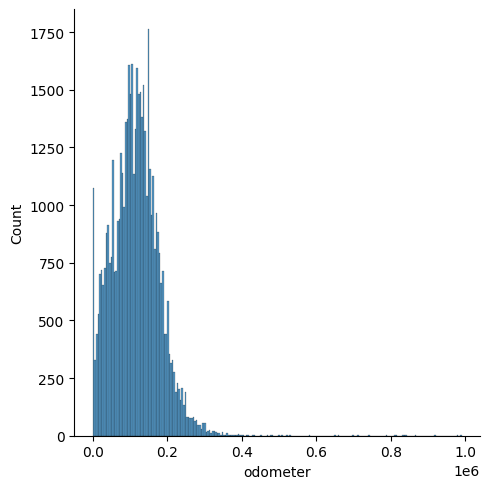

In [228]:
print(sns.displot(df2['odometer']))
print()
print(kstest(df2['odometer'].dropna(), 'norm'))

In [229]:
print(df2.isnull().sum())
print('------------------------------------------')
print(df.isnull().sum())

price                              0
model_year                         0
model                              0
condition                          0
cylinders                          0
fuel                               0
odometer                           1
transmission                       0
type                               0
paint_color                        0
is_4wd                             0
date_posted                        0
days_listed                        0
year_posted                        0
tahun_kepemilikan_kendaraan     3070
miles/years                    12225
miles/years_per_model           7343
condition_likert                   0
nilai_odometer_null                1
dtype: int64
------------------------------------------
price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953

**Kesimpulan**

Kami telah mengisi baris null untuk kolom odometer menggunakan nilai median odometer berdasarkan tahun rilis kendaraan dan kondisi kendaraan saat pertama kali diposting. Pertimbangan kami diperkuat oleh nilai *correlation metrix* yang menunjukkan adanya hubungan yang cukup signifikan dari ketiga kolom tersebut (odometer, model_year, condition). Namun, sesuai prediksi kami sebelumnya bahwa akan ada 1 baris yang tidak akan terisi nilai yaitu untuk baris index ke-50971. Pada titik ini kami sangat yakin bahwa tidak ada referensi lain yang lebih otentik untuk mengisi baris tersebut selain daripada aspek kondisi kendaraan. Jadi kami hanya akan menggunakan aspek ini untuk mengisi baris *null*-nya.

In [230]:
pivot_condition = pd.pivot_table(df2,index='condition', values='odometer', aggfunc = 'median').reset_index()
pivot_condition

,condition,odometer
0,excellent,104598.0
1,fair,182189.0
2,good,129000.0
3,like new,72426.5
4,new,7500.0
5,salvage,148500.0


**Kesimpulan**

Kami percaya dengan adanya hubungan negatif yang cukup signifikan antara kondisi kendaraan terhadap jarak tempuh kendaraan tersebut, maka dapat menjadi dasar fakta yang cukup valid bagi kami untuk mengisi kolom odometer bahkan hanya dengan salah satu aspek yang teridentifikasi

In [231]:
df2['odometer'].fillna(value=129000.0, inplace=True)

In [232]:
# identifikasi baris null pada dataset
df2.isnull().sum()

price                              0
model_year                         0
model                              0
condition                          0
cylinders                          0
fuel                               0
odometer                           0
transmission                       0
type                               0
paint_color                        0
is_4wd                             0
date_posted                        0
days_listed                        0
year_posted                        0
tahun_kepemilikan_kendaraan     3070
miles/years                    12225
miles/years_per_model           7343
condition_likert                   0
nilai_odometer_null                1
dtype: int64

## **4.5. Memperbaiki Tipe Data**
Ilmu dan perhitungan berbasis data yang efektif membutuhkan pemahaman bagaimana data disimpan dan dimanipulasi. Bahasa pemrograman seringkali keliru mempertimbangkan tipe dari setiap variabel yang secara otomatis disimpan. Artinya kami mungkin perlu mengonversi beberapa variabel pada dataset menjadi tipe data lain yang lebih relevan.

In [233]:
# identifikasi dataset untuk bagian memperbaiki tipe data
df2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert,nilai_odometer_null
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not identified,1.0,2018-06-23,19,2018,7.0,20714.285714,12038.461538,2,127346.0
1,3300,2011,kia soul,good,4.0,gas,188963.0,manual,SUV,black,0.0,2019-02-16,71,2019,8.0,23620.375000,20121.200000,2,127346.0
2,9599,2011,chevrolet camaro,good,6.0,gas,100680.0,manual,coupe,silver,0.0,2018-10-26,18,2018,7.0,14382.857143,10251.812500,2,127346.0
3,4900,2011,nissan sentra,good,4.0,gas,116000.0,automatic,sedan,silver,0.0,2018-11-30,19,2018,7.0,16571.428571,16384.098214,2,127346.0
4,12990,2011,ford expedition,good,8.0,gas,124775.0,automatic,SUV,custom,1.0,2018-06-11,50,2018,7.0,17825.000000,14372.333333,2,127346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50971,18000,1929,ford f-150,good,8.0,gas,129000.0,manual,other,silver,0.0,2018-11-18,59,2018,89.0,NaN,NaN,2,NaN
50972,22300,2003,chevrolet corvette,new,8.0,gas,163991.0,manual,convertible,black,0.0,2018-11-08,23,2018,15.0,NaN,NaN,5,163991.0
50973,3800,1984,honda accord,new,4.0,gas,121000.0,manual,sedan,blue,0.0,2019-01-05,162,2019,35.0,3457.142857,13720.779221,5,121000.0
50974,5000,1986,chevrolet corvette,salvage,8.0,gas,100.0,automatic,coupe,black,0.0,2018-08-18,22,2018,32.0,3.125000,2990.631579,0,100.0


In [234]:
# identifikasi tipe data
df2.dtypes

price                                   int64
model_year                              int64
model                                  object
condition                              object
cylinders                             float64
fuel                                   object
odometer                              float64
transmission                           object
type                                   object
paint_color                            object
is_4wd                                float64
date_posted                    datetime64[ns]
days_listed                             int64
year_posted                             int32
tahun_kepemilikan_kendaraan           float64
miles/years                           float64
miles/years_per_model                 float64
condition_likert                        int64
nilai_odometer_null                   float64
dtype: object

**Kesimpulan**

Kami berhasil mengidentifikasi sejumlah tipe data yang masih keliru untuk beberapa kolom yang akan kami lakukan transformasi, seperti :
1. cylinders >> integer
2. odometer >> integer
3. is_4wd >> boolean

In [235]:
# transformasi tipe data menjadi integer
df2['cylinders'] = df2['cylinders'].astype('int64')
df2['odometer'] = df2['odometer'].astype('int64')
df2['is_4wd'] = df2['is_4wd'].astype('int64')

In [236]:
# reidentifikasi tipe data setelah dilakukan konversi
df2.dtypes

price                                   int64
model_year                              int64
model                                  object
condition                              object
cylinders                               int64
fuel                                   object
odometer                                int64
transmission                           object
type                                   object
paint_color                            object
is_4wd                                  int64
date_posted                    datetime64[ns]
days_listed                             int64
year_posted                             int32
tahun_kepemilikan_kendaraan           float64
miles/years                           float64
miles/years_per_model                 float64
condition_likert                        int64
nilai_odometer_null                   float64
dtype: object

In [237]:
# identifikasi dataset
df2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert,nilai_odometer_null
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not identified,1,2018-06-23,19,2018,7.0,20714.285714,12038.461538,2,127346.0
1,3300,2011,kia soul,good,4,gas,188963,manual,SUV,black,0,2019-02-16,71,2019,8.0,23620.375000,20121.200000,2,127346.0
2,9599,2011,chevrolet camaro,good,6,gas,100680,manual,coupe,silver,0,2018-10-26,18,2018,7.0,14382.857143,10251.812500,2,127346.0
3,4900,2011,nissan sentra,good,4,gas,116000,automatic,sedan,silver,0,2018-11-30,19,2018,7.0,16571.428571,16384.098214,2,127346.0
4,12990,2011,ford expedition,good,8,gas,124775,automatic,SUV,custom,1,2018-06-11,50,2018,7.0,17825.000000,14372.333333,2,127346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50971,18000,1929,ford f-150,good,8,gas,129000,manual,other,silver,0,2018-11-18,59,2018,89.0,NaN,NaN,2,NaN
50972,22300,2003,chevrolet corvette,new,8,gas,163991,manual,convertible,black,0,2018-11-08,23,2018,15.0,NaN,NaN,5,163991.0
50973,3800,1984,honda accord,new,4,gas,121000,manual,sedan,blue,0,2019-01-05,162,2019,35.0,3457.142857,13720.779221,5,121000.0
50974,5000,1986,chevrolet corvette,salvage,8,gas,100,automatic,coupe,black,0,2018-08-18,22,2018,32.0,3.125000,2990.631579,0,100.0


## **4.6. Memperbaiki Kualitas Data**
Untuk mempermudah seluruh proses analisis, kami akan memanipulasi dataset kami dengan sejumlah penyesuaian

In [238]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan
df2['month_posted'] = df2['date_posted'].dt.month
df2['day_of_week_posted'] = df2['date_posted'].dt.strftime('%A')
df2.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert,nilai_odometer_null,month_posted,day_of_week_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not identified,...,2018-06-23,19,2018,7.0,20714.285714,12038.461538,2,127346.0,6,Saturday
1,3300,2011,kia soul,good,4,gas,188963,manual,SUV,black,...,2019-02-16,71,2019,8.0,23620.375000,20121.200000,2,127346.0,2,Saturday
2,9599,2011,chevrolet camaro,good,6,gas,100680,manual,coupe,silver,...,2018-10-26,18,2018,7.0,14382.857143,10251.812500,2,127346.0,10,Friday
3,4900,2011,nissan sentra,good,4,gas,116000,automatic,sedan,silver,...,2018-11-30,19,2018,7.0,16571.428571,16384.098214,2,127346.0,11,Friday
4,12990,2011,ford expedition,good,8,gas,124775,automatic,SUV,custom,...,2018-06-11,50,2018,7.0,17825.000000,14372.333333,2,127346.0,6,Monday


In [239]:
# Tambahkan usia kendaraan saat iklan ditayangkan
df2['usia_kendaraan'] = df2['year_posted'] - df2['model_year']
df2.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert,nilai_odometer_null,month_posted,day_of_week_posted,usia_kendaraan
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not identified,...,19,2018,7.0,20714.285714,12038.461538,2,127346.0,6,Saturday,7
1,3300,2011,kia soul,good,4,gas,188963,manual,SUV,black,...,71,2019,8.0,23620.375000,20121.200000,2,127346.0,2,Saturday,8
2,9599,2011,chevrolet camaro,good,6,gas,100680,manual,coupe,silver,...,18,2018,7.0,14382.857143,10251.812500,2,127346.0,10,Friday,7
3,4900,2011,nissan sentra,good,4,gas,116000,automatic,sedan,silver,...,19,2018,7.0,16571.428571,16384.098214,2,127346.0,11,Friday,7
4,12990,2011,ford expedition,good,8,gas,124775,automatic,SUV,custom,...,50,2018,7.0,17825.000000,14372.333333,2,127346.0,6,Monday,7


In [240]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun
# Mula - mula untuk usia kendaraan lebih dari 0 tahun
df2['miles_per_years'] = df2['odometer'] / df2['usia_kendaraan'].where((df2['usia_kendaraan'] > 0))

# Selanjutnya untuk usia kendaraan lebih dari 0 tahun
df2.loc[df2['miles_per_years'].isnull(), 'miles_per_years'] = df2.loc[df2['miles_per_years'].isnull(), 'odometer']
df2.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,year_posted,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert,nilai_odometer_null,month_posted,day_of_week_posted,usia_kendaraan,miles_per_years
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not identified,...,2018,7.0,20714.285714,12038.461538,2,127346.0,6,Saturday,7,20714.285714
1,3300,2011,kia soul,good,4,gas,188963,manual,SUV,black,...,2019,8.0,23620.375000,20121.200000,2,127346.0,2,Saturday,8,23620.375000
2,9599,2011,chevrolet camaro,good,6,gas,100680,manual,coupe,silver,...,2018,7.0,14382.857143,10251.812500,2,127346.0,10,Friday,7,14382.857143
3,4900,2011,nissan sentra,good,4,gas,116000,automatic,sedan,silver,...,2018,7.0,16571.428571,16384.098214,2,127346.0,11,Friday,7,16571.428571
4,12990,2011,ford expedition,good,8,gas,124775,automatic,SUV,custom,...,2018,7.0,17825.000000,14372.333333,2,127346.0,6,Monday,7,17825.000000


In [241]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah
dictionary_cond = {
    'new' : 5,
    'like new' : 4,
    'excellent' : 3,
    'good' : 2,
    'fair' : 1,
    'salvage' : 0
}

df2['skala_condition'] = df2['condition'].map(dictionary_cond)
df2.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert,nilai_odometer_null,month_posted,day_of_week_posted,usia_kendaraan,miles_per_years,skala_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not identified,...,7.0,20714.285714,12038.461538,2,127346.0,6,Saturday,7,20714.285714,2
1,3300,2011,kia soul,good,4,gas,188963,manual,SUV,black,...,8.0,23620.375000,20121.200000,2,127346.0,2,Saturday,8,23620.375000,2
2,9599,2011,chevrolet camaro,good,6,gas,100680,manual,coupe,silver,...,7.0,14382.857143,10251.812500,2,127346.0,10,Friday,7,14382.857143,2
3,4900,2011,nissan sentra,good,4,gas,116000,automatic,sedan,silver,...,7.0,16571.428571,16384.098214,2,127346.0,11,Friday,7,16571.428571,2
4,12990,2011,ford expedition,good,8,gas,124775,automatic,SUV,custom,...,7.0,17825.000000,14372.333333,2,127346.0,6,Monday,7,17825.000000,2


In [242]:
# identifikasi duplikat pada data
duplicate = df2[df2.duplicated()]
duplicate

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,tahun_kepemilikan_kendaraan,miles/years,miles/years_per_model,condition_likert,nilai_odometer_null,month_posted,day_of_week_posted,usia_kendaraan,miles_per_years,skala_condition


**Kesimpulan**

Pada tahap ini, kami telah secara khusus melakukan manipulasi terhadap dataset kami, membuat sejumlah kalkulasi dan menambahkan sejumlah kolom kedalam dataset. Aksi yang kami lakukan antara lain seperti memecah periode tercatat saat kendaraan diiklankan di website kedalam 3 kolom yang secara spesifik memisahkannya menjadi periode tahunan, bulanan dan *days of week*. Selain itu kami juga menambahkan kolom usia kendaraan dalam satuan tahun, dan juga rata-rata jarak tempuh yang telah dilampaui oleh kendaraan per tahun

## **4.7. Memeriksa Data yang Sudah Bersih**
Mengingat baris data kami sudah siap untuk dianalisis, maka kami akan melanjutkan dengan mengeliminasi sejumlah kolom variabel pada dataset. Hal ini kami lakukan terutama karena sebelumnya kami telah sempat menambahkan sejumlah kolom bantuan dalam proses - proses kebelakang. Sangat penting untuk melihat dan merujuk kepada hal apa yang sesungguhnya paling utama dan relevan untuk digunakan dalam suatu proses analisa

Jadi kami akan menghilangkan sejumlah kolom 'bantuan' kami, dan mempertahankan sekitar 80% kolom pada dataset yang paling substansial dalam proses analisa kedepan

In [243]:
# memuat dataset
df2 = df2.drop(['tahun_kepemilikan_kendaraan',
                'miles/years',
                'miles/years_per_model',
                'condition_likert',
                'nilai_odometer_null'], axis=1)


In [244]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50976 entries, 0 to 50975
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               50976 non-null  int64         
 1   model_year          50976 non-null  int64         
 2   model               50976 non-null  object        
 3   condition           50976 non-null  object        
 4   cylinders           50976 non-null  int64         
 5   fuel                50976 non-null  object        
 6   odometer            50976 non-null  int64         
 7   transmission        50976 non-null  object        
 8   type                50976 non-null  object        
 9   paint_color         50976 non-null  object        
 10  is_4wd              50976 non-null  int64         
 11  date_posted         50976 non-null  datetime64[ns]
 12  days_listed         50976 non-null  int64         
 13  year_posted         50976 non-null  int32     

In [245]:
# tampilkan sampel data
df2.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_of_week_posted,usia_kendaraan,miles_per_years,skala_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not identified,1,2018-06-23,19,2018,6,Saturday,7,20714.285714,2
1,3300,2011,kia soul,good,4,gas,188963,manual,SUV,black,0,2019-02-16,71,2019,2,Saturday,8,23620.375000,2
2,9599,2011,chevrolet camaro,good,6,gas,100680,manual,coupe,silver,0,2018-10-26,18,2018,10,Friday,7,14382.857143,2
3,4900,2011,nissan sentra,good,4,gas,116000,automatic,sedan,silver,0,2018-11-30,19,2018,11,Friday,7,16571.428571,2
4,12990,2011,ford expedition,good,8,gas,124775,automatic,SUV,custom,1,2018-06-11,50,2018,6,Monday,7,17825.000000,2


In [246]:
df2.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_of_week_posted,usia_kendaraan,miles_per_years,skala_condition
50971,18000,1929,ford f-150,good,8,gas,129000,manual,other,silver,0,2018-11-18,59,2018,11,Sunday,89,1449.438202,2
50972,22300,2003,chevrolet corvette,new,8,gas,163991,manual,convertible,black,0,2018-11-08,23,2018,11,Thursday,15,10932.733333,5
50973,3800,1984,honda accord,new,4,gas,121000,manual,sedan,blue,0,2019-01-05,162,2019,1,Saturday,35,3457.142857,5
50974,5000,1986,chevrolet corvette,salvage,8,gas,100,automatic,coupe,black,0,2018-08-18,22,2018,8,Saturday,32,3.125000,0
50975,37900,1958,chevrolet impala,good,8,gas,62799,automatic,coupe,not identified,0,2018-08-11,10,2018,8,Saturday,60,1046.650000,2


**Kesimpulan**

Jadi ini yang kami miliki saat ini, 19 kolom yang memiliki sekitar 50.000 data. Seluruh baris telah terisi nilai dengan tipe data yang relevan yang akan mendukung proses EDA kami.

## **4.8. Mempelajari Parameter Inti**
Manajemen telah menginformasikan kepada kami baru-baru ini, mereka mengatakan akan sangat senang apabila hasil analisa kami merupakan sesuatu yang bersifat *applicable* bagi perusahaan. Artinya hasil analisa kami akan sangat lebih bermanfaat dan tepat sasaran apabila hal ini berkaitan dengan karakteristik variabel-variabel yang berada dibawah kendali manajemen, sehingga kedepan perusahaan dapat secara lebih efektif dalam merumuskan dan mengembangkan strategi harga berbasis data.

Sampai kepada titik ini, kami menyadari bahwa model hubungan statistik yang sedang berusaha kami bangun, harus terlebih dahulu terbebas dari asumsi adanya gejala outlier pada data. Secara mengejutkan kami akan menunjukkan bagaimana suatu outlier dapat memengaruhi bentuk pola dan kemudahan pembacaan histogram yang pada gilirannya menyebabkan hubungan antar variabel menjadi lebih lemah. Sehingga artinya apabila asumsi ini tidak terpenuhi bukan tidak mungkin manajemen akan terjebak dalam pengambilan keputusan yang keliru. Jadi kita akan terlebih dahulu fokus kepada sejumlah variabel yang memiliki potensi mengandung outlier sebagai berikut :
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder
- Kondisi

In [247]:
# munculkan dataset
df2.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_of_week_posted,usia_kendaraan,miles_per_years,skala_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not identified,1,2018-06-23,19,2018,6,Saturday,7,20714.285714,2
1,3300,2011,kia soul,good,4,gas,188963,manual,SUV,black,0,2019-02-16,71,2019,2,Saturday,8,23620.375000,2
2,9599,2011,chevrolet camaro,good,6,gas,100680,manual,coupe,silver,0,2018-10-26,18,2018,10,Friday,7,14382.857143,2
3,4900,2011,nissan sentra,good,4,gas,116000,automatic,sedan,silver,0,2018-11-30,19,2018,11,Friday,7,16571.428571,2
4,12990,2011,ford expedition,good,8,gas,124775,automatic,SUV,custom,1,2018-06-11,50,2018,6,Monday,7,17825.000000,2


In [248]:
df2.describe()

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed,year_posted,month_posted,usia_kendaraan,miles_per_years,skala_condition
count,50976.000000,50976.000000,50976.000000,50976.000000,50976.000000,50976,50976.000000,50976.000000,50976.000000,50976.000000,50976.000000,50976.000000
mean,12130.932243,2009.750922,6.120625,115157.935852,0.496489,2018-10-25 02:26:23.050847232,39.542628,2018.307419,6.629787,8.556497,17570.225774,2.638104
min,1.000000,1908.000000,3.000000,0.000000,0.000000,2018-05-01 00:00:00,0.000000,2018.000000,1.000000,0.000000,0.000000,0.000000
25%,5000.000000,2006.000000,4.000000,72518.000000,0.000000,2018-07-29 00:00:00,19.000000,2018.000000,3.000000,4.000000,11071.428571,2.000000
50%,9000.000000,2011.000000,6.000000,113864.000000,0.000000,2018-10-25 00:00:00,33.000000,2018.000000,7.000000,8.000000,14942.571429,3.000000
75%,16800.000000,2014.000000,8.000000,153000.000000,1.000000,2019-01-21 00:00:00,53.000000,2019.000000,10.000000,12.000000,20600.000000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,2019-04-19 00:00:00,271.000000,2019.000000,12.000000,110.000000,373200.000000,5.000000
std,10042.100831,6.208489,1.657579,62646.475826,0.499993,NaN,28.197632,0.461429,3.474165,6.219820,12325.686254,0.712582


In [249]:
# membuat fungsi untuk menghasilkan grafik histogram
def histogram(dataset, column, bins):
    plt.hist(dataset[column], bins=bins)
    plt.title("Histogram of " + column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

    return plt.hist(dataset[column], bins=bins)

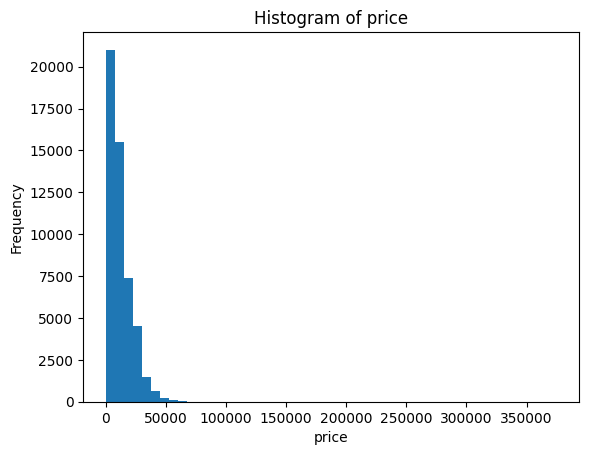

(array([2.1010e+04, 1.5499e+04, 7.3560e+03, 4.5380e+03, 1.4910e+03,
        6.6200e+02, 2.4500e+02, 1.0700e+02, 3.6000e+01, 6.0000e+00,
        5.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000000e+00, 7.5009800e+03, 1.5000960e+04, 2.2500940e+04,
        3.0000920e+04, 3.7500900e+04, 4.5000880e+04, 5.2500860e+04,
        6.0000840e+04, 6.7500820e+04, 7.5000800e+04, 8.2500780e+04,
        9.0000760e+04, 9.7500740e+04, 1.0500072e+05, 1.1250070e+05,
        1.2000068e+05, 1.2750066e+05, 1.350006

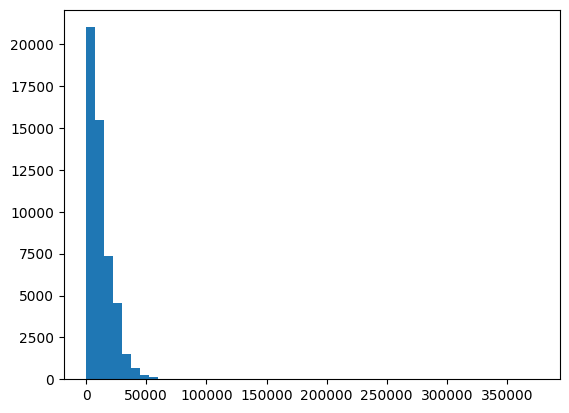

In [250]:
# Plot histogram untuk kolom price
histogram(df2, 'price', 50)

**Kesimpulan**

Pola distribusi data untuk variabel 'price' menunjukkan dispersi yang condong ke kanan (*positive skew*). Sebagian besar harga terdistribusi pada kisaran nilai 5.000 hingga 10.000 dengan puncak histogram berada pada level harga 9.000. Secara inklusif, untuk rentang data keseluruhan yang berkisar pada nilai data 1 hingga 375.000, masih terindikasi adanya gejala outlier pada level yang signifikan

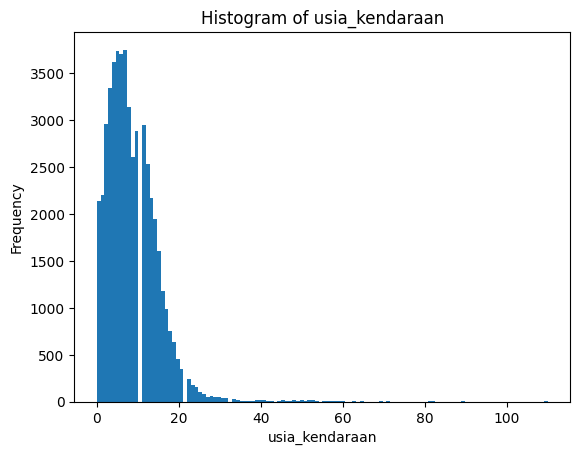

(array([2.141e+03, 2.206e+03, 2.957e+03, 3.341e+03, 3.619e+03, 3.742e+03,
        3.700e+03, 3.752e+03, 3.135e+03, 2.602e+03, 2.888e+03, 0.000e+00,
        2.951e+03, 2.531e+03, 2.165e+03, 1.949e+03, 1.610e+03, 1.177e+03,
        9.830e+02, 7.560e+02, 6.300e+02, 4.590e+02, 3.470e+02, 0.000e+00,
        2.410e+02, 1.790e+02, 1.560e+02, 1.060e+02, 8.500e+01, 4.700e+01,
        6.200e+01, 5.400e+01, 5.200e+01, 3.400e+01, 3.500e+01, 0.000e+00,
        2.600e+01, 2.200e+01, 8.000e+00, 1.000e+01, 9.000e+00, 1.100e+01,
        1.800e+01, 1.400e+01, 1.700e+01, 6.000e+00, 1.000e+00, 0.000e+00,
        1.000e+01, 1.200e+01, 6.000e+00, 5.000e+00, 1.300e+01, 9.000e+00,
        1.400e+01, 8.000e+00, 1.500e+01, 1.800e+01, 8.000e+00, 0.000e+00,
        4.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

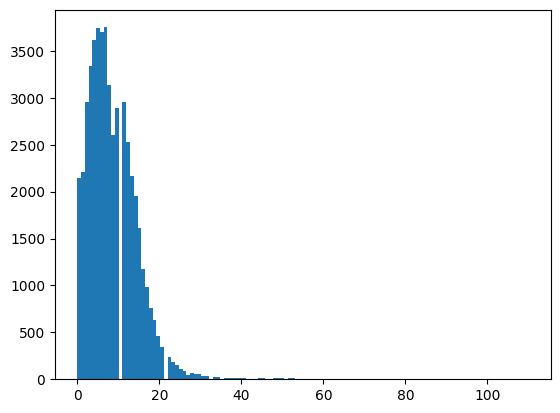

In [251]:
# Plot histogram untuk kolom usia kendaraan
histogram(df2, 'usia_kendaraan', 120)

**Kesimpulan**

Sebagian besar usia kendaraan berada pada kisaran usia 0 hingga 15 tahun dengan sejumlah kecil dispersi data tersebar di sepanjang *long tail* yang menunjukkan kendaraan - kendaraan dengan skala usia yang lebih tua. Sementara itu, puncak histogram berada pada usia kendaraan 8 tahun untuk keseluruhan rentang data yang berada pada kisaran usia 0 hingga 110 tahun, sehingga memperlihatkan pola skewness positif yang signifikan pada kolom usia kendaraaan

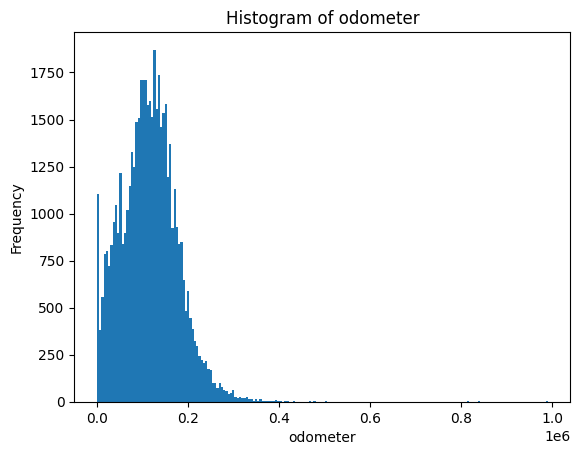

(array([1.104e+03, 3.830e+02, 5.550e+02, 7.860e+02, 8.030e+02, 7.190e+02,
        8.320e+02, 9.560e+02, 1.047e+03, 8.980e+02, 1.218e+03, 8.410e+02,
        8.960e+02, 1.021e+03, 1.149e+03, 1.330e+03, 1.246e+03, 1.486e+03,
        1.508e+03, 1.711e+03, 1.711e+03, 1.711e+03, 1.575e+03, 1.601e+03,
        1.516e+03, 1.871e+03, 1.558e+03, 1.736e+03, 1.462e+03, 1.532e+03,
        1.581e+03, 1.193e+03, 1.370e+03, 9.220e+02, 1.131e+03, 9.290e+02,
        8.380e+02, 8.470e+02, 6.470e+02, 4.820e+02, 5.860e+02, 4.460e+02,
        3.880e+02, 3.210e+02, 2.980e+02, 2.440e+02, 2.210e+02, 2.060e+02,
        2.160e+02, 1.740e+02, 1.710e+02, 1.000e+02, 9.800e+01, 7.500e+01,
        9.900e+01, 7.700e+01, 6.400e+01, 5.800e+01, 4.200e+01, 4.900e+01,
        6.200e+01, 2.500e+01, 2.100e+01, 2.500e+01, 2.100e+01, 1.900e+01,
        2.300e+01, 1.400e+01, 1.200e+01, 4.000e+00, 1.700e+01, 2.000e+00,
        1.200e+01, 5.000e+00, 2.000e+00, 4.000e+00, 6.000e+00, 2.000e+00,
        6.000e+00, 9.000e+00, 4.000e+0

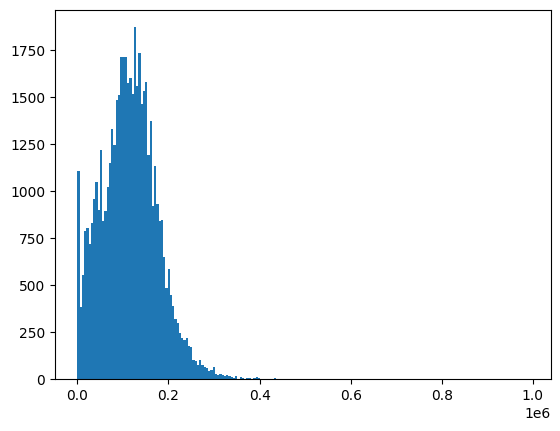

In [252]:
# Plot histogram untuk kolom odometer
histogram(df2, 'odometer', 200)

**Kesimpulan**

Histogram kami menunjukkan pola distribusi nilai pada kolom odometer yang cenderung miring kekanan (*positive skew*) sekaligus juga memperlihatkan rentang sebaran yang sebagian besar berada pada kisaran 80.000 hingga 150.000 dengan puncak histogram pada jarak tempuh kendaraan sebesar 113.864. Secara keseluruhan rentang nilai jarak tempuh kendaraan berada pada kisaran 0 hingga 900.000, mengindikasikan secara kuat adanya outlier pada data yang dibuktikan dengan sebaran data jarak tempuh kendaraan yang lebih tinggi tersebar disepanjang *long tail* histogram.

Untuk 2 variabel terakhir merupakan tipe data kategorikal. Kami menggunakan pendekatan yang berbeda dari ke-3 variabel sebelumnya untuk menganalisa outliernya, dimana kategori nilai dengan frekuensi yang tidak signifikan akan diasumsikan sebagai outlier.

Text(0.5, 1.0, "Cylinder's Histogram")

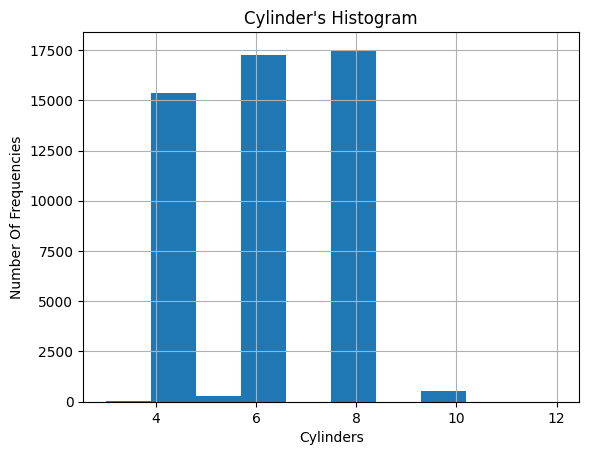

In [253]:
# Plot histogram untuk kolom cylinders
df2.hist('cylinders')

plt.xlabel('Cylinders')
plt.ylabel('Number Of Frequencies')
plt.title("Cylinder's Histogram")

In [254]:
df2['cylinders'].value_counts()

cylinders
8     17517
6     17247
4     15339
10      544
5       293
3        34
12        2
Name: count, dtype: int64

**Kesimpulan**

Secara keseluruhan rentang penyebaran data berada pada kisaran 3 hingga 12 silinder. Namun, sebagian besar data kami mewakili kendaraan - kendaraan dengan 4, 6 dan 8 silinder dimana nilai median data merupakan kendaraan - kendaraan yang memiliki 6 silinder. Mengacu kepada pendekatan metode outlier yang kami gunakan, maka distribusi data ini teridentifikasi memiliki outlier.

Text(0.5, 1.0, "Condition's Histogram")

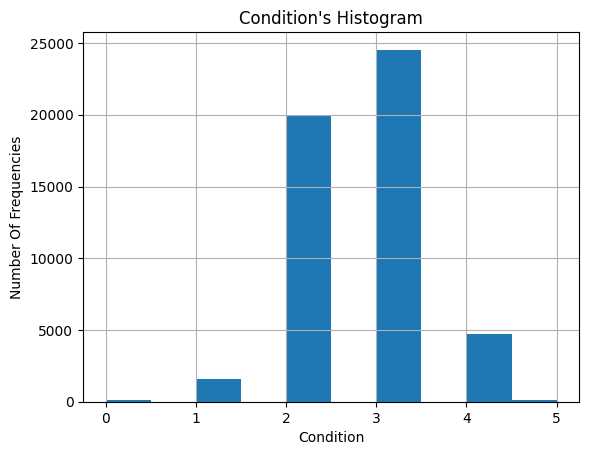

In [255]:
# Plot histogram untuk kolom condition
df2.hist('skala_condition')

plt.xlabel('Condition')
plt.ylabel('Number Of Frequencies')
plt.title("Condition's Histogram")

In [256]:
df2['skala_condition'].value_counts()

skala_condition
3    24533
2    19901
4     4693
1     1592
5      143
0      114
Name: count, dtype: int64

**Kesimpulan**

Skala yang menunjukkan kondisi kendaraan yang diposting memiliki rentang nilai 0 (*salvage*) hingga 5 (*new*). Sebagian besar kendaraan yang diposting pada website dalam keadaan layak, dimana titik puncak histogram mewakili kendaraan - kendaraan dengan kondisi prima. Namun, kami juga masih menemukan sejumlah outlier, yaitu sebagain kecil kendaraan yang diposting dengan kondisi *salvage* dan *excelent*

## **4.9. Mempelajari dan Menangani Outlier**

Kami menyadari bahwa dengan semakin tingginya persentase jumlah nilai outlier pada data akan menyebabkan pemodelan hubungan yang hendak kami ciptakan mnghasilkan nilai yang semakin menyimpang dari kondisi riil. Pada langkah sebelumnya kami telah berhasil mengidentifikasi adanya indikasi gejala outlier pada variabel Harga, Usia kendaraan ketika iklan ditayangkan, dan Jarak tempuh. Untuk membuktikannya secara konklusif, kami akan menggunakan metode *Interquartile Range* (IQR) yang menggunakan asumsi batas bawah dan batas atas untuk menunjukkan parameter nilai yang dianggap sebagai outlier.

In [257]:
df2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_of_week_posted,usia_kendaraan,miles_per_years,skala_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not identified,1,2018-06-23,19,2018,6,Saturday,7,20714.285714,2
1,3300,2011,kia soul,good,4,gas,188963,manual,SUV,black,0,2019-02-16,71,2019,2,Saturday,8,23620.375000,2
2,9599,2011,chevrolet camaro,good,6,gas,100680,manual,coupe,silver,0,2018-10-26,18,2018,10,Friday,7,14382.857143,2
3,4900,2011,nissan sentra,good,4,gas,116000,automatic,sedan,silver,0,2018-11-30,19,2018,11,Friday,7,16571.428571,2
4,12990,2011,ford expedition,good,8,gas,124775,automatic,SUV,custom,1,2018-06-11,50,2018,6,Monday,7,17825.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50971,18000,1929,ford f-150,good,8,gas,129000,manual,other,silver,0,2018-11-18,59,2018,11,Sunday,89,1449.438202,2
50972,22300,2003,chevrolet corvette,new,8,gas,163991,manual,convertible,black,0,2018-11-08,23,2018,11,Thursday,15,10932.733333,5
50973,3800,1984,honda accord,new,4,gas,121000,manual,sedan,blue,0,2019-01-05,162,2019,1,Saturday,35,3457.142857,5
50974,5000,1986,chevrolet corvette,salvage,8,gas,100,automatic,coupe,black,0,2018-08-18,22,2018,8,Saturday,32,3.125000,0


In [258]:
df2.describe()

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed,year_posted,month_posted,usia_kendaraan,miles_per_years,skala_condition
count,50976.000000,50976.000000,50976.000000,50976.000000,50976.000000,50976,50976.000000,50976.000000,50976.000000,50976.000000,50976.000000,50976.000000
mean,12130.932243,2009.750922,6.120625,115157.935852,0.496489,2018-10-25 02:26:23.050847232,39.542628,2018.307419,6.629787,8.556497,17570.225774,2.638104
min,1.000000,1908.000000,3.000000,0.000000,0.000000,2018-05-01 00:00:00,0.000000,2018.000000,1.000000,0.000000,0.000000,0.000000
25%,5000.000000,2006.000000,4.000000,72518.000000,0.000000,2018-07-29 00:00:00,19.000000,2018.000000,3.000000,4.000000,11071.428571,2.000000
50%,9000.000000,2011.000000,6.000000,113864.000000,0.000000,2018-10-25 00:00:00,33.000000,2018.000000,7.000000,8.000000,14942.571429,3.000000
75%,16800.000000,2014.000000,8.000000,153000.000000,1.000000,2019-01-21 00:00:00,53.000000,2019.000000,10.000000,12.000000,20600.000000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,2019-04-19 00:00:00,271.000000,2019.000000,12.000000,110.000000,373200.000000,5.000000
std,10042.100831,6.208489,1.657579,62646.475826,0.499993,NaN,28.197632,0.461429,3.474165,6.219820,12325.686254,0.712582


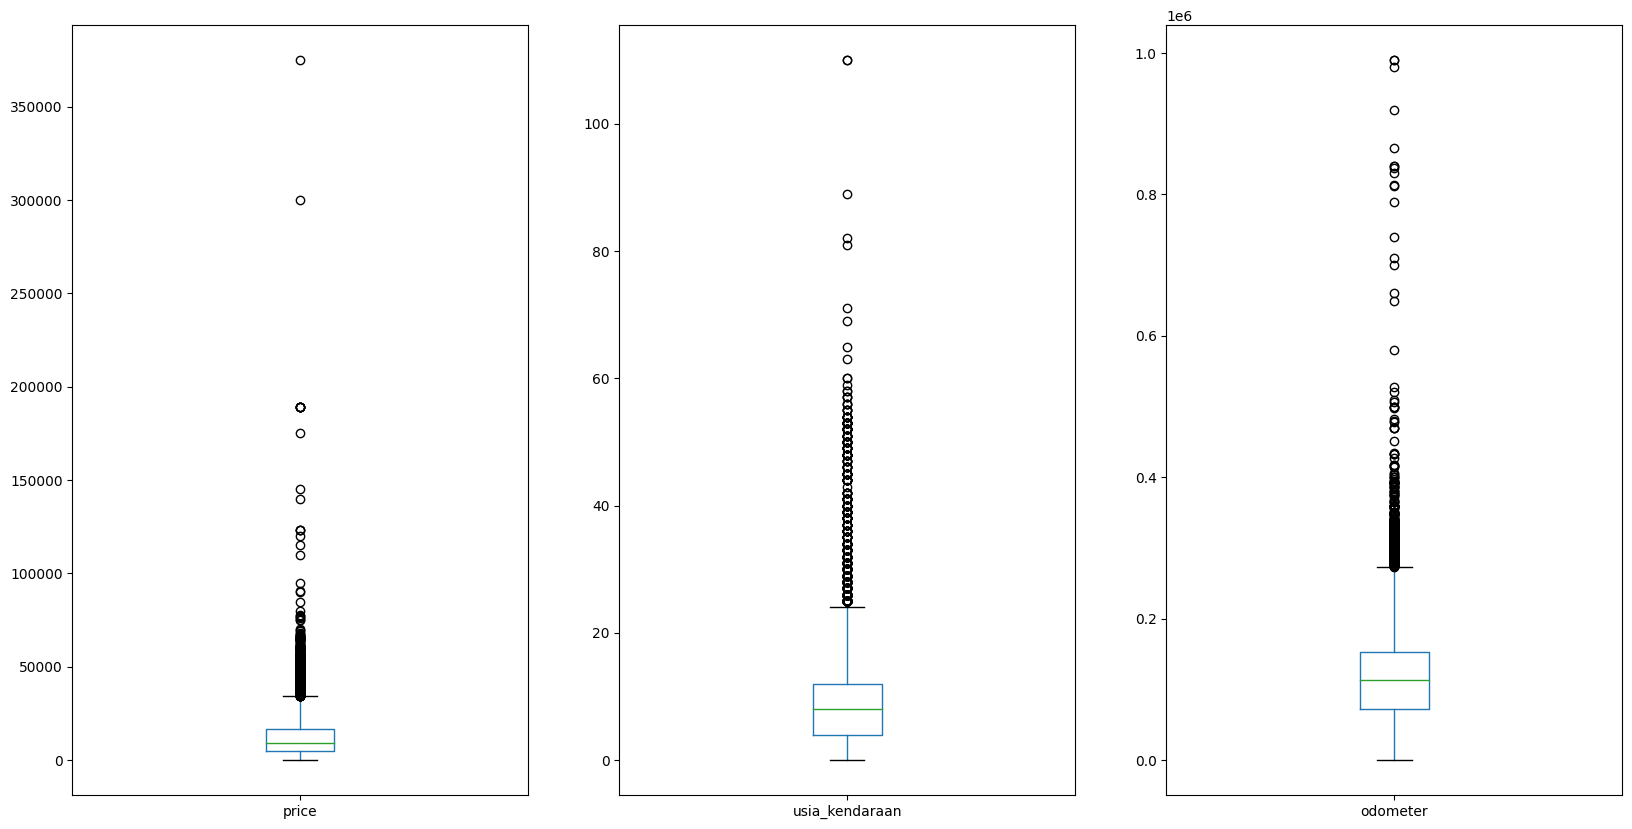

In [259]:
# identifikasi outlier menggunakan boxplot
column_num = ['price', 'usia_kendaraan', 'odometer']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
for i,col in enumerate(column_num):
    a = df2.boxplot(col, ax=axes.flatten()[i],grid=False)
plt.show()

In [260]:
# Membuat fungsi untuk menghitung batas bawah dan batas atas nilai variabel
def iqr_outlier(dataset, col):
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound, upper_bound

In [261]:
# hitung batas bawah dan batas atas nilai variabel
print('Batas bawah dan batas atas untuk variabel harga :' ,iqr_outlier(df2, 'price'))
print()
print('Batas bawah dan batas atas untuk variabel usia kendaraan :' ,iqr_outlier(df2, 'usia_kendaraan'))
print()
print('Batas bawah dan batas atas untuk variabel odometer :' ,iqr_outlier(df2, 'odometer'))

Batas bawah dan batas atas untuk variabel harga : (-12700.0, 34500.0)

Batas bawah dan batas atas untuk variabel usia kendaraan : (-8.0, 24.0)

Batas bawah dan batas atas untuk variabel odometer : (-48205.0, 273723.0)


In [262]:
# identifikasi jumlah outlier untuk variabel price
batas_bawah = (df2['price'] < -12700)
batas_atas = (df2['price'] > 34500)

# jumlah outlier untuk variabel harga
df_price_fil = df2.loc[(batas_bawah | batas_atas)]
len(df_price_fil)

1634

In [263]:
# identifikasi jumlah outlier untuk variabel usia kendaraan
batas_bawah = (df2['usia_kendaraan'] < -8)
batas_atas = (df2['usia_kendaraan'] > 24)

# jumlah outlier untuk variabel usia kendaraan
df_age_fil = df2.loc[(batas_bawah | batas_atas)]
len(df_age_fil)

759

In [264]:
# identifikasi jumlah outlier untuk variabel odometer
batas_bawah = (df2['odometer'] < -48205)
batas_atas = (df2['odometer'] > 273723)

# jumlah outlier untuk variabel odometer
df_odo_fil = df2.loc[(batas_bawah | batas_atas)]
len(df_odo_fil)

615

In [265]:
# Buat fungsi yang akan menghapus outlier untuk variabel harga
def remove_outliers(dataset, col_name):
    Q1 = dataset[col_name].quantile(0.25)
    Q3 = dataset[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    dataset = dataset[(dataset[col_name] >= lower_bound) & (dataset[col_name] <= upper_bound)]
    return dataset

In [266]:
# hapus outlier pada dataset
df_price = remove_outliers(df2, 'price')
df_usia = remove_outliers(df_price, 'usia_kendaraan')
df_odometer = remove_outliers(df_usia, 'odometer')

In [267]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
df_clean = df_odometer.copy()
df_clean

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_of_week_posted,usia_kendaraan,miles_per_years,skala_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not identified,1,2018-06-23,19,2018,6,Saturday,7,20714.285714,2
1,3300,2011,kia soul,good,4,gas,188963,manual,SUV,black,0,2019-02-16,71,2019,2,Saturday,8,23620.375000,2
2,9599,2011,chevrolet camaro,good,6,gas,100680,manual,coupe,silver,0,2018-10-26,18,2018,10,Friday,7,14382.857143,2
3,4900,2011,nissan sentra,good,4,gas,116000,automatic,sedan,silver,0,2018-11-30,19,2018,11,Friday,7,16571.428571,2
4,12990,2011,ford expedition,good,8,gas,124775,automatic,SUV,custom,1,2018-06-11,50,2018,6,Monday,7,17825.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50945,1700,1996,ford mustang,salvage,6,gas,180000,manual,convertible,white,0,2019-03-31,46,2019,3,Sunday,23,7826.086957,0
50964,7000,2016,ford focus,salvage,3,gas,28000,automatic,sedan,white,0,2018-05-18,96,2018,5,Friday,2,14000.000000,0
50966,16499,2015,honda odyssey,new,6,gas,52975,automatic,mini-van,white,0,2019-03-06,36,2019,3,Wednesday,4,13243.750000,5
50969,3200,2006,chevrolet trailblazer,new,8,gas,158380,automatic,SUV,black,1,2019-03-13,41,2019,3,Wednesday,13,12183.076923,5


In [268]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48040 entries, 0 to 50972
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               48040 non-null  int64         
 1   model_year          48040 non-null  int64         
 2   model               48040 non-null  object        
 3   condition           48040 non-null  object        
 4   cylinders           48040 non-null  int64         
 5   fuel                48040 non-null  object        
 6   odometer            48040 non-null  int64         
 7   transmission        48040 non-null  object        
 8   type                48040 non-null  object        
 9   paint_color         48040 non-null  object        
 10  is_4wd              48040 non-null  int64         
 11  date_posted         48040 non-null  datetime64[ns]
 12  days_listed         48040 non-null  int64         
 13  year_posted         48040 non-null  int32         


In [269]:
df_clean.describe()

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed,year_posted,month_posted,usia_kendaraan,miles_per_years,skala_condition
count,48040.000000,48040.000000,48040.000000,48040.000000,48040.000000,48040,48040.000000,48040.000000,48040.000000,48040.000000,48040.000000,48040.000000
mean,11202.750146,2010.015362,6.055641,114844.767673,0.485450,2018-10-24 21:36:23.380516096,39.529725,2018.306453,6.634555,8.291091,17476.894477,2.634055
min,1.000000,1994.000000,3.000000,0.000000,0.000000,2018-05-01 00:00:00,0.000000,2018.000000,1.000000,0.000000,0.000000,0.000000
25%,4999.000000,2007.000000,4.000000,75044.000000,0.000000,2018-07-29 00:00:00,19.000000,2018.000000,3.000000,4.000000,11195.250000,2.000000
50%,8995.000000,2011.000000,6.000000,115223.000000,0.000000,2018-10-25 00:00:00,33.000000,2018.000000,7.000000,8.000000,14928.516484,3.000000
75%,15988.000000,2014.000000,8.000000,152600.000000,1.000000,2019-01-21 00:00:00,53.000000,2019.000000,10.000000,12.000000,20466.571429,3.000000
max,34500.000000,2019.000000,12.000000,274171.000000,1.000000,2019-04-19 00:00:00,271.000000,2019.000000,12.000000,24.000000,195700.000000,5.000000
std,7813.908527,5.135696,1.657402,56518.804351,0.499793,NaN,28.202124,0.461025,3.472985,5.146027,11487.634604,0.699399


**Kesimpulan**

Pada akhirnya kami telah berhasil menangani sejumlah nilai outlier pada data yang akan mengganggu seluruh rangkaian proses analisa kami. Hasilnya dapat dibuktikan melalui *description metrix table*, dimana kami menemukan bahwa nilai pemusatan (*central tendency*) untuk 50% data kami (median) bergerak semakin mendekati nilai rata-rata untuk sejumlah besar variabel pada dataset. Hal ini merupakan sinyal yang baik sebagaimana prasyarat dari normalitas data yang mengharuskan nilai mean, median dan modus yang identik. Namun, konsekuensi yang harus kami terima dari proses ini yaitu bahwa kami juga telah kehilangan sekitar 6% jumlah data.

## **4.10. Mempelajari Parameter Inti Tanpa Outlier**
Selanjutnya kami akan mengidentifikasi pola histogram untuk sejumlah kolom pada dataset yang telah dibersihkan

In [270]:
def histogram(df, column, bins):
    plt.hist(df[column], bins=bins)
    plt.title("Histogram of " + column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

    return plt.hist(df[column], bins=bins)

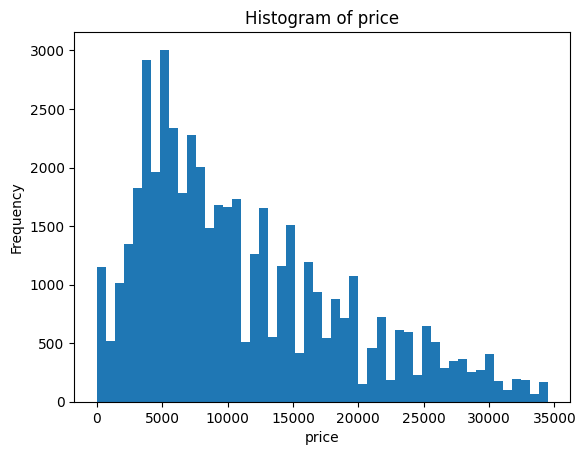

(array([1152.,  519., 1011., 1350., 1824., 2922., 1959., 3006., 2334.,
        1784., 2278., 2002., 1487., 1681., 1661., 1727.,  509., 1265.,
        1654.,  550., 1155., 1511.,  414., 1197.,  937.,  541.,  877.,
         717., 1070.,  155.,  461.,  720.,  187.,  609.,  597.,  232.,
         645.,  508.,  285.,  350.,  364.,  258.,  273.,  404.,  181.,
         101.,  197.,  185.,   68.,  166.]),
 array([1.000000e+00, 6.909800e+02, 1.380960e+03, 2.070940e+03,
        2.760920e+03, 3.450900e+03, 4.140880e+03, 4.830860e+03,
        5.520840e+03, 6.210820e+03, 6.900800e+03, 7.590780e+03,
        8.280760e+03, 8.970740e+03, 9.660720e+03, 1.035070e+04,
        1.104068e+04, 1.173066e+04, 1.242064e+04, 1.311062e+04,
        1.380060e+04, 1.449058e+04, 1.518056e+04, 1.587054e+04,
        1.656052e+04, 1.725050e+04, 1.794048e+04, 1.863046e+04,
        1.932044e+04, 2.001042e+04, 2.070040e+04, 2.139038e+04,
        2.208036e+04, 2.277034e+04, 2.346032e+04, 2.415030e+04,
        2.484028e+04, 2.

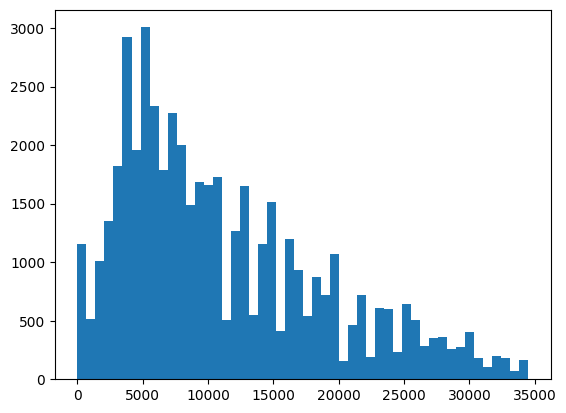

In [272]:
# identifikasi pola histogram variabel harga untuk 'clean' dataset
histogram(df_clean, 'price', 50)

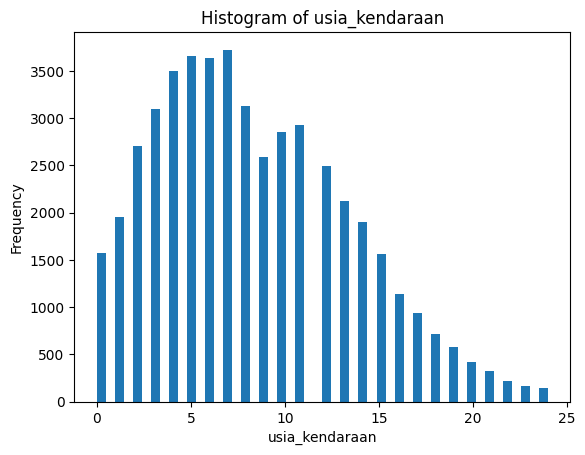

(array([1569.,    0., 1956.,    0., 2709.,    0., 3098.,    0., 3496.,
           0., 3659.,    0., 3638.,    0., 3724.,    0., 3122.,    0.,
        2588.,    0., 2854.,    0., 2921.,    0.,    0., 2494.,    0.,
        2123.,    0., 1903.,    0., 1563.,    0., 1140.,    0.,  933.,
           0.,  713.,    0.,  579.,    0.,  417.,    0.,  321.,    0.,
         213.,    0.,  163.,    0.,  144.]),
 array([ 0.  ,  0.48,  0.96,  1.44,  1.92,  2.4 ,  2.88,  3.36,  3.84,
         4.32,  4.8 ,  5.28,  5.76,  6.24,  6.72,  7.2 ,  7.68,  8.16,
         8.64,  9.12,  9.6 , 10.08, 10.56, 11.04, 11.52, 12.  , 12.48,
        12.96, 13.44, 13.92, 14.4 , 14.88, 15.36, 15.84, 16.32, 16.8 ,
        17.28, 17.76, 18.24, 18.72, 19.2 , 19.68, 20.16, 20.64, 21.12,
        21.6 , 22.08, 22.56, 23.04, 23.52, 24.  ]),
 <BarContainer object of 50 artists>)

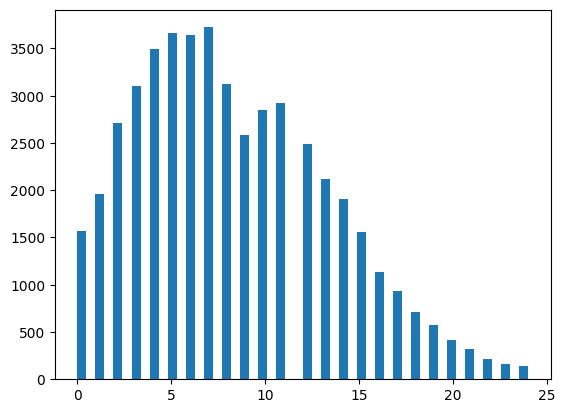

In [273]:
# identifikasi pola histogram variabel usia kendaraan untuk 'clean' dataset
histogram(df_clean, 'usia_kendaraan', 50)

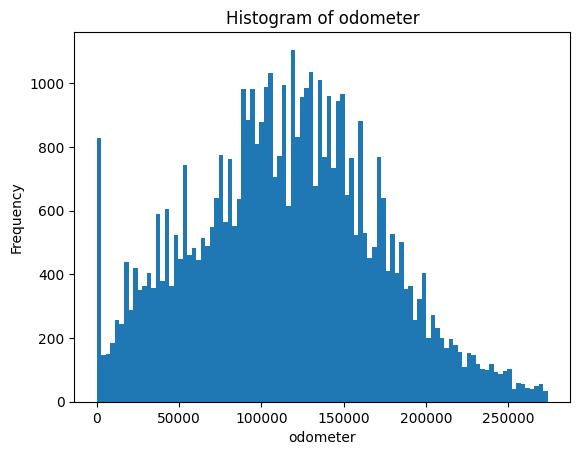

(array([ 828.,  147.,  150.,  183.,  257.,  245.,  440.,  289.,  419.,
         350.,  365.,  406.,  357.,  591.,  378.,  607.,  365.,  523.,
         448.,  745.,  460.,  484.,  444.,  515.,  488.,  548.,  639.,
         774.,  566.,  762.,  551.,  636.,  983.,  884.,  983.,  811.,
         878.,  989., 1033.,  706.,  773.,  995.,  616., 1106.,  832.,
         956.,  985., 1037.,  677., 1012.,  770.,  962.,  733.,  945.,
         967.,  648.,  766.,  524.,  881.,  531.,  453.,  485.,  768.,
         639.,  412.,  528.,  403.,  502.,  353.,  363.,  256.,  322.,
         403.,  201.,  272.,  233.,  201.,  170.,  198.,  178.,  155.,
         109.,  154.,  146.,  117.,  102.,   99.,  118.,   93.,   87.,
          95.,  104.,   39.,   59.,   57.,   43.,   39.,   49.,   57.,
          35.]),
 array([     0.  ,   2741.71,   5483.42,   8225.13,  10966.84,  13708.55,
         16450.26,  19191.97,  21933.68,  24675.39,  27417.1 ,  30158.81,
         32900.52,  35642.23,  38383.94,  41125.65,  4

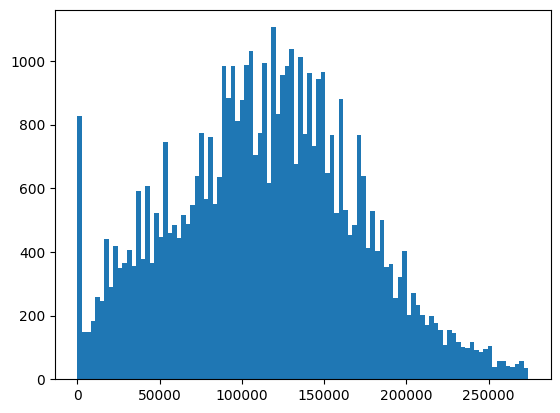

In [274]:
# identifikasi pola histogram variabel odometer untuk 'clean' dataset
histogram(df_clean, 'odometer', 100)

**Kesimpulan**

Dengan tidak adanya outlier, kami menemukan bahwa distribusi data dari variabel - variabel tersebut semakin mendekati pola distribusi normal. Hal ini dapat kembali menjadi sinyal kuat yang membuktikan bahwa proses penanganan outlier yang kami lakukan sudah mampu untuk semakin memenuhi asumsi pemodelan.

## **4.11. Masa Berlaku Iklan**
Kami akan menganalisis berapa hari iklan ditayangkan (`days_listed`), yaitu dengan menghitung nilai rata-rata dan mediannya untuk kemudian menjelaskan berapa lama secara umum sebuah iklan ditayangkan. Kami juga akan berfokus untuk menentukan lama durasi periode suatu iklan dihapus dengan cepat, dan atau ketika suatu iklan ditayangkan dalam waktu yang sangat lama. Terakhir kami akan melihat apakah terdapat perbedaan preferensi waktu ketika kendaraan diposting di website.

Text(0.5, 1.0, 'distribution of the duration of the ad displayed')

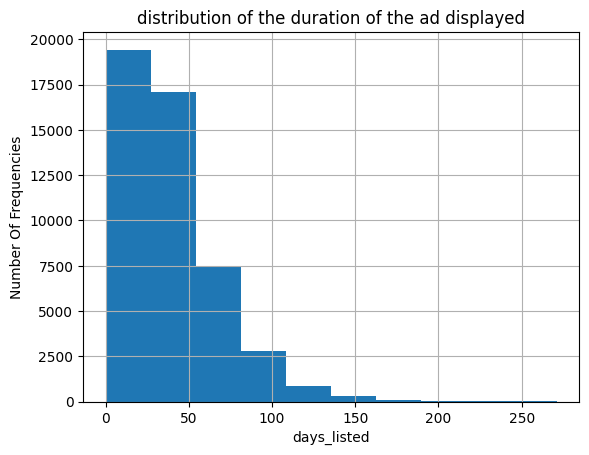

In [275]:
df_clean.hist('days_listed')

plt.xlabel('days_listed')
plt.ylabel('Number Of Frequencies')
plt.title('distribution of the duration of the ad displayed')

In [276]:
print(df_clean['days_listed'].describe())
print()
print()
print('Kesimpulan:')
print()
print('Rata-rata lama suatu iklan ditayangkan yaitu :', df_clean['days_listed'].mean().round(1), 'hari')
print()
print('Nilai median untuk periode penayangan iklan yaitu :',df_clean['days_listed'].median().round(1), 'hari')
print()
print('Durasi waktu paling singkat sebuah iklan ditayangkan yaitu :', df_clean['days_listed'].min(), 'hari')
print()
print('Durasi waktu terlama sebuah iklan ditayangkan yaitu :', df_clean['days_listed'].max(), 'hari')

count    48040.000000
mean        39.529725
std         28.202124
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64


Kesimpulan:

Rata-rata lama suatu iklan ditayangkan yaitu : 39.5 hari

Nilai median untuk periode penayangan iklan yaitu : 33.0 hari

Durasi waktu paling singkat sebuah iklan ditayangkan yaitu : 0 hari

Durasi waktu terlama sebuah iklan ditayangkan yaitu : 271 hari


In [277]:
df_clean

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_of_week_posted,usia_kendaraan,miles_per_years,skala_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not identified,1,2018-06-23,19,2018,6,Saturday,7,20714.285714,2
1,3300,2011,kia soul,good,4,gas,188963,manual,SUV,black,0,2019-02-16,71,2019,2,Saturday,8,23620.375000,2
2,9599,2011,chevrolet camaro,good,6,gas,100680,manual,coupe,silver,0,2018-10-26,18,2018,10,Friday,7,14382.857143,2
3,4900,2011,nissan sentra,good,4,gas,116000,automatic,sedan,silver,0,2018-11-30,19,2018,11,Friday,7,16571.428571,2
4,12990,2011,ford expedition,good,8,gas,124775,automatic,SUV,custom,1,2018-06-11,50,2018,6,Monday,7,17825.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50945,1700,1996,ford mustang,salvage,6,gas,180000,manual,convertible,white,0,2019-03-31,46,2019,3,Sunday,23,7826.086957,0
50964,7000,2016,ford focus,salvage,3,gas,28000,automatic,sedan,white,0,2018-05-18,96,2018,5,Friday,2,14000.000000,0
50966,16499,2015,honda odyssey,new,6,gas,52975,automatic,mini-van,white,0,2019-03-06,36,2019,3,Wednesday,4,13243.750000,5
50969,3200,2006,chevrolet trailblazer,new,8,gas,158380,automatic,SUV,black,1,2019-03-13,41,2019,3,Wednesday,13,12183.076923,5


In [278]:
# identifikasi jumlah iklan dengan durasi rata-rata
len(df_clean.loc[(df_clean['days_listed'] >= 33) & (df_clean['days_listed'] <= 40)])

5756

In [279]:
# identifikasi jumlah iklan dengan durasi lebih singkat dibandingkan rata-rata
len(df_clean.loc[df_clean['days_listed'] < 40])

28590

In [280]:
# identifikasi jumlah iklan dengan periode penayangan tersingkat
len(df_clean.loc[(df_clean['days_listed'] <= 1)])

213

In [281]:
# identifikasi jumlah iklan dengan periode penayangan yang lama
len(df_clean.loc[(df_clean['days_listed'] >= 180)])

69

<Axes: xlabel='day_of_week_posted', ylabel='count'>

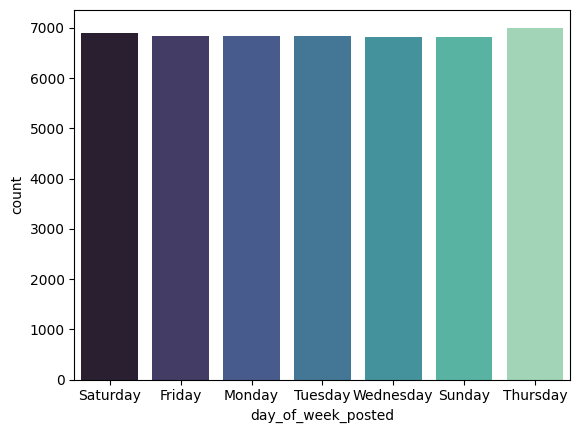

In [282]:
# identifikasi preferensi waktu pendaftaran iklan oleh customer
sns.countplot(x=df_clean["day_of_week_posted"], palette='mako')

**Kesimpulan**

Secara umum kami menemukan bahwa rata-rata lama iklan ditayangkan adalah sekitar 1 bulan, yaitu sebanyak 5.756 iklan kendaraan. Kami juga menemukan sekitar 213 kendaraan dengan durasi penayangan yang sangat singkat (<=1 hari), mengindikasikan adanya sejumlah kendaraan yang dapat segera terjual sesaat setelah iklan ditayangkan, dan juga untuk sejumlah kendaraan yang terjual 1 hari setelah iklan ditayangkan. Kami juga telah mengamati bahwa terdapat sekitar 69 iklan kendaraan yang bertahan hingga lebih dari 6 bulan semenjak kendaraan terdaftar. Sebagai panduan umum, konsultan otomotif biasanya merekomendasikan periode iklan selama 30-60 hari. Mengacu pada referensi dasar tersebut, maka kami mengasumsikan durasi standar untuk sebuah kendaraan semenjak pertama kali kendaraan tersebut terdaftar hingga terjual di website pemasaran adalah 1 minggu atau lebih, dan kurang dari 60 hari. Terakhir, secara grafik kami tidak menemukan fenomena yang cukup signifikan untuk membuktikan adanya perbedaan preferensi waktu pengiklanan. Hal ini terbukti dari grafik *countplot* yang menunjukkan equivalensi untuk masing - masing bar yang merepresentasikan periode hari ketika iklan diposting.

## **4.12. Harga Rata-Rata Setiap Jenis Kendaraan**
Kami akan melakukan analisis terhadap jumlah iklan yang ditayangkan dan harga rata-rata untuk setiap jenis kendaraan. Untuk pertimbangan efisiensi proses analisis, kami akan menggunakan pendekatan visual grafis yang dapat mempermudah kami untuk mengidentifikasi ada atau tidaknya suatu pola ketergantungan antara jumlah iklan ditayangkan untuk setiap jenis kendaraan terhadap harga rata-rata kendaraan tersebut. Diakhir bagian ini kami akan memilih dua jenis kendaraan dengan jumlah iklan terbanyak dan melanjutkan proses analisis.

Jadi kami akan terlebih dahulu melakukan filtering hanya terhadap baris data yang memenuhi kriteria standar durasi pemasaran dan menambahkannya ke variabel normal_duration. Kemudian dilanjutkan dengan sejumlah proses aggregasi dan diakhiri dengan pengidentifikasian pola untuk membuktikan ada atau tidaknya pola ketergantungan antara jumlah iklan yang ditayangkan terhadap harga rata-rata kendaraan.

In [283]:
# membuat datrafame yang memuat baris data sesuai kriteria standar umum durasi pemasaran kendaraan
normal_duration = df_clean.loc[(df_clean['days_listed'] >= 7) & (df_clean['days_listed'] <= 60)]
normal_duration.sort_values('days_listed', ascending=True)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_of_week_posted,usia_kendaraan,miles_per_years,skala_condition
42347,27000,2016,toyota tacoma,excellent,6,gas,40500,automatic,truck,not identified,1,2018-08-22,7,2018,8,Wednesday,2,20250.000000,3
18926,10500,2010,bmw x5,excellent,8,gas,104532,automatic,SUV,grey,1,2018-06-29,7,2018,6,Friday,8,13066.500000,3
16894,16690,2018,chevrolet malibu,excellent,4,gas,44116,automatic,sedan,custom,0,2018-12-26,7,2018,12,Wednesday,0,44116.000000,3
47496,2995,1996,ford mustang,good,8,gas,173000,automatic,coupe,grey,0,2019-01-22,7,2019,1,Tuesday,23,7521.739130,2
36326,17995,2014,ram 1500,good,8,gas,82751,automatic,truck,white,0,2019-01-06,7,2019,1,Sunday,5,16550.200000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32137,15900,2004,ford f-350 sd,excellent,8,diesel,152000,automatic,truck,not identified,1,2019-04-18,60,2019,4,Thursday,15,10133.333333,3
37173,25000,2008,chevrolet corvette,like new,8,gas,136356,manual,coupe,black,0,2018-10-31,60,2018,10,Wednesday,10,13635.600000,4
4718,1995,2014,toyota corolla,excellent,4,gas,72358,automatic,sedan,silver,0,2019-02-03,60,2019,2,Sunday,5,14471.600000,3
20921,3200,2007,ford fusion,good,4,gas,140750,automatic,sedan,blue,0,2018-12-27,60,2018,12,Thursday,11,12795.454545,2


**Kesimpulan**

Jadi kami menemukan 36.572 baris data yang memenuhi kategori standar durasi pemasaran suatu kendaraan, yaitu diantara periode 1 minggu hingga 60 hari (+- 2 bulan). Apabila suatu kendaraan terjual dibawah durasi 7 hari, kami menetapkannya sebagai periode pemostingan singkat, sebaliknya periode lebih dari 2 bulan maka ditetapkan sebagai periode pemostingan lamban

In [284]:
# pengelompokan berdasarkan tipe kendaraan, jumlah iklan dan rata-rata harga
normal_duration_agg = normal_duration.pivot_table(index='type', values='price', aggfunc=['mean', 'count'])
normal_duration_agg.columns = ['harga_rata_rata', 'jumlah_iklan']
normal_duration_agg = normal_duration_agg.sort_values('jumlah_iklan', ascending=False)
normal_duration_agg = normal_duration_agg.reset_index()
normal_duration_agg

,type,harga_rata_rata,jumlah_iklan
0,sedan,6958.668689,9064
1,SUV,10479.523598,9005
2,truck,15014.501848,8387
3,pickup,14975.890208,4800
4,coupe,13395.846945,1555
5,wagon,8916.657966,1111
6,mini-van,8021.267981,862
7,hatchback,6832.082888,748
8,van,8386.259770,435
9,convertible,12937.914179,268


<Axes: title={'center': 'Hubungan Antara Jumlah Iklan Terhadap Rata-Rata Harga'}, xlabel='harga_rata_rata', ylabel='jumlah_iklan'>

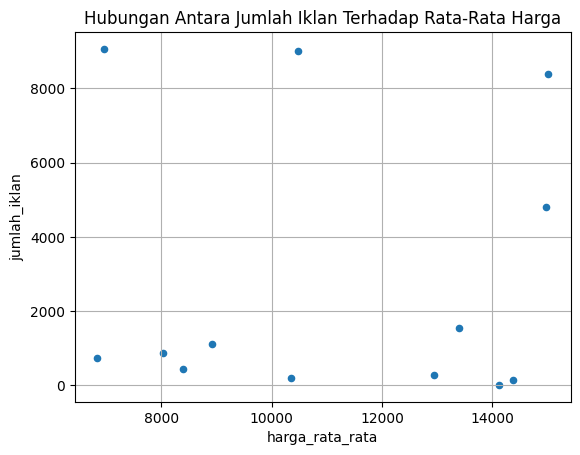

In [285]:
# identifikasi pola hubungan jumlah iklan dan rata-rata harga
normal_duration_agg.plot(x='harga_rata_rata',
                          y='jumlah_iklan',
                          title = 'Hubungan Antara Jumlah Iklan Terhadap Rata-Rata Harga',
                          kind='scatter',
                          grid=True
                         )

**Kesimpulan**

Secara visual, jelas terbukti bahwa sebaran seperti ini tidak merepresentasikan adanya suatu pola hubungan antar variabel, secara khusus untuk variabel yang sedang kami uji, yaitu jumlah iklan ditayangkan dan harga rata-rata kendaraan. Misalnya, kami dapat mengidentifikasi jumlah tayangan iklan yang sangat minim untuk tipe kendaraan seperti bus, offroad, dan convertable yang dapat terjual dengan harga yang sangat tinggi, namun hal ini tidak berlaku untuk tipe kendaraan seperti hatchback dan van. Bahkan untuk top 2 tipe kendaraan dengan jumlah iklan terbanyak ternyata memiliki disparitas harga rata-rata yang sangat signifikan. Jadi kami dapat menyimpulkan bahwa tidak terdapat hubungan antara jumlah iklan yang ditayangkan dan rata-rata harga kendaraan.

Kami akan tetap berupaya untuk mengidentifikasi aspek - aspek apa saja yang sesungguhnya memiliki hubungan kuat terhadap harga kendaraan. Dengan mempertimbangkan signifikansi hasil akhir yang akan kami peroleh, maka untuk analisa selanjutnya kami hanya akan berfokus kepada dua tipe kendaraan dengan jumlah iklan terbanyak dan disparitas harga yang sangat tinggi. Kami akan membuat dataframe baru bernama **df_normal_duration** yang memuat baris yang memenuhi kriteria tersebut.

<Axes: xlabel='jumlah_iklan', ylabel='type'>

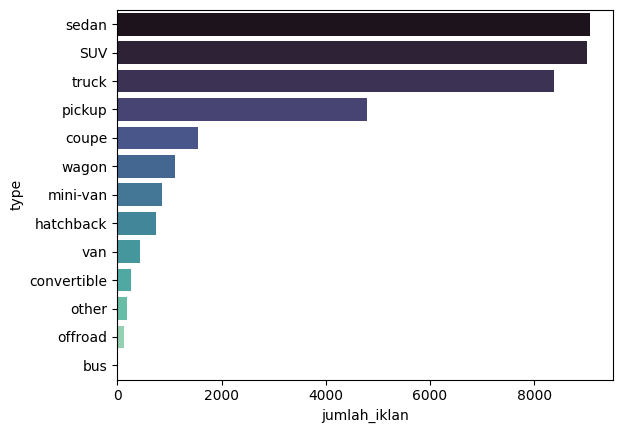

In [286]:
# identifikasi 2 tipe kendaraan dengan jumlah iklan terbanyak
sns.barplot(data=normal_duration_agg, x='jumlah_iklan', y='type', palette='mako')

In [287]:
# membuat dataframe baru dengan memasukkan kriteria yang telah sebelumnya dideskripsikan
df_normal_duration = normal_duration.loc[(normal_duration['type'] == 'sedan') | (normal_duration['type'] <= 'SUV')]
df_normal_duration

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_of_week_posted,usia_kendaraan,miles_per_years,skala_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not identified,1,2018-06-23,19,2018,6,Saturday,7,20714.285714,2
3,4900,2011,nissan sentra,good,4,gas,116000,automatic,sedan,silver,0,2018-11-30,19,2018,11,Friday,7,16571.428571,2
4,12990,2011,ford expedition,good,8,gas,124775,automatic,SUV,custom,1,2018-06-11,50,2018,6,Monday,7,17825.000000,2
5,7995,2011,subaru forester,good,4,gas,112000,automatic,SUV,blue,1,2019-02-12,53,2019,2,Tuesday,8,14000.000000,2
9,8950,2011,toyota camry,good,6,gas,127346,automatic,sedan,black,0,2019-01-23,40,2019,1,Wednesday,8,15918.250000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50916,2495,1995,jeep grand cherokee,like new,6,gas,85000,automatic,SUV,not identified,0,2018-10-29,29,2018,10,Monday,23,3695.652174,4
50927,800,2002,toyota camry,salvage,4,gas,189388,automatic,sedan,not identified,0,2018-05-09,56,2018,5,Wednesday,16,11836.750000,0
50930,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2018,11,Wednesday,16,11343.750000,0
50941,6995,2010,jeep grand cherokee laredo,new,6,gas,99371,automatic,SUV,not identified,1,2019-03-27,24,2019,3,Wednesday,9,11041.222222,5


## **4.13. Faktor Harga**
Kami akan melakukan analisa untuk mencari hubungan antara sejumlah variabel terhadap harga kendaraan dengan menggunakan dataframe df_normal_duration yang memuat 18.069 baris data. Dataframe ini hanya memuat 2 tipe kendaraan (sedan dan SUV) dengan jumlah tayangan iklan tertinggi, adanya aspek disparitas harga yang signifikan dan periode durasi penayangan yang sesuai standar bisnis dengan pertimbangan agar hasil analisa kami dapat menjadi suatu model statistika bisnis yang terstandarisasi, dimana salah satu syarat utamanya adalah terbebas dari anomali data.

Pada tahap awal, kami akan menggunakan *correlation matrix* untuk mengidentifikasi nilai korelasi dari sejumlah variabel terhadap harga kendaraan dan mengurutkannya berdasarkan nilai hubungan yang tertinggi.

In [288]:
# munculkan dataset
df_normal_duration

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_of_week_posted,usia_kendaraan,miles_per_years,skala_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not identified,1,2018-06-23,19,2018,6,Saturday,7,20714.285714,2
3,4900,2011,nissan sentra,good,4,gas,116000,automatic,sedan,silver,0,2018-11-30,19,2018,11,Friday,7,16571.428571,2
4,12990,2011,ford expedition,good,8,gas,124775,automatic,SUV,custom,1,2018-06-11,50,2018,6,Monday,7,17825.000000,2
5,7995,2011,subaru forester,good,4,gas,112000,automatic,SUV,blue,1,2019-02-12,53,2019,2,Tuesday,8,14000.000000,2
9,8950,2011,toyota camry,good,6,gas,127346,automatic,sedan,black,0,2019-01-23,40,2019,1,Wednesday,8,15918.250000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50916,2495,1995,jeep grand cherokee,like new,6,gas,85000,automatic,SUV,not identified,0,2018-10-29,29,2018,10,Monday,23,3695.652174,4
50927,800,2002,toyota camry,salvage,4,gas,189388,automatic,sedan,not identified,0,2018-05-09,56,2018,5,Wednesday,16,11836.750000,0
50930,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2018,11,Wednesday,16,11343.750000,0
50941,6995,2010,jeep grand cherokee laredo,new,6,gas,99371,automatic,SUV,not identified,1,2019-03-27,24,2019,3,Wednesday,9,11041.222222,5


In [293]:
df_normal_duration.dtypes

price                          int64
model_year                     int64
model                         object
condition                     object
cylinders                      int64
fuel                          object
odometer                       int64
transmission                  object
type                          object
paint_color                   object
is_4wd                         int64
date_posted           datetime64[ns]
days_listed                    int64
year_posted                    int32
month_posted                   int32
day_of_week_posted            object
usia_kendaraan                 int64
miles_per_years              float64
skala_condition                int64
dtype: object

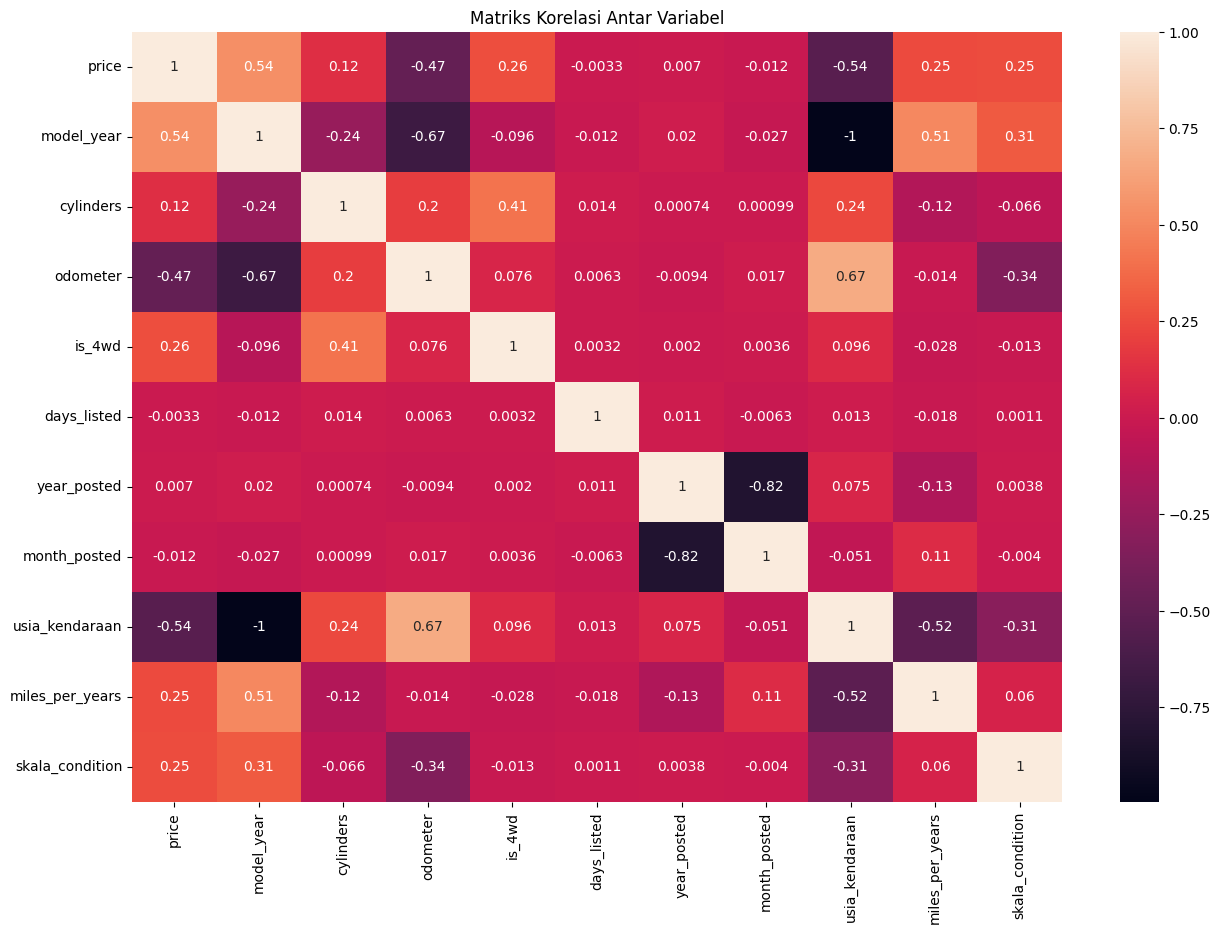

In [294]:
# identifikasi pola hubungan antar variabel menggunakan matriks korelasi
numerical_columns = df_normal_duration.select_dtypes(include=['int32','int64', 'float64'])
plt.figure(figsize=(15, 10))

corr = numerical_columns.corr()
sns.heatmap(corr, annot=True)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()


**Kesimpulan**

Kami mengidentifikasi adanya pola hubungan negatif yang cukup kuat antara harga kendaraan terhadap usia kendaraan, yang menjadi logis mengingat semakin tua usia suatu kendaraan akan menyebabkan harganya semakin rendah dipasar. Meskipun begitu, kami tidak dapat men-generalisir gagasan ini mengingat sebagian besar kendaraan antik yang sangat tua dapat dihargai oleh pasar diatas nilai wajarnya (*overpriced*). Hal ini menjelaskan alasan mengapa nilai korelasinya hanya sebesar -0.54. Aspek kondisi juga menunjukkan hubungan positif yang cukup signifikan, dimana secara ideal kami memahami bahwa semakin baik kondisi suatu kendaraan maka akan dihargai lebih tinggi. Namun, kami juga  melihat hal yang aneh disini, dimana meskipun tidak cukup signifikan kami menemukan bukti bahwa pasar menghargai lebih mahal untuk kendaraan-kendaraan dengan tingkat jarak tempuh pertahun yang lebih tinggi. Ada indikasi bahwa kendaraan-kendaraan dengan miles_per_years lebih tinggi merupakan kendaraan - kendaraan yang mampu mendukung aktifitas *adventure* seperti dengan adanya sistem tambahan penggerak 4 roda, dibuktikan melalui tingkat korelasi yang hampir sama untuk 2 variabel tersebut sehingga menjadikan 2 aspek ini sesungguhnya saling berkaitan. Meskipun begitu, kami juga akan tetap berfokus pada aspek jarak tempuh secara umum yang direpresentasikan oleh variabel odomoter. Dimana kami melihat secara ideal, terlepas dari kondisi apapun, pasar akan menghargai lebih rendah terhadap harga suatu kendaraan dengan semakin tingginya jarak tempuh kendaraan tersebut. Secara umum, hal ini menjelaskan mengapa hubungan dan korelasi tidak selalu berarti sebab-akibat.

Kami juga akan membuktikannya secara visual menggunakan *scatterplot*

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1, 'Pola Hubungan Antar Variabel Menggunakan Pendekatan Scatter Matrix')

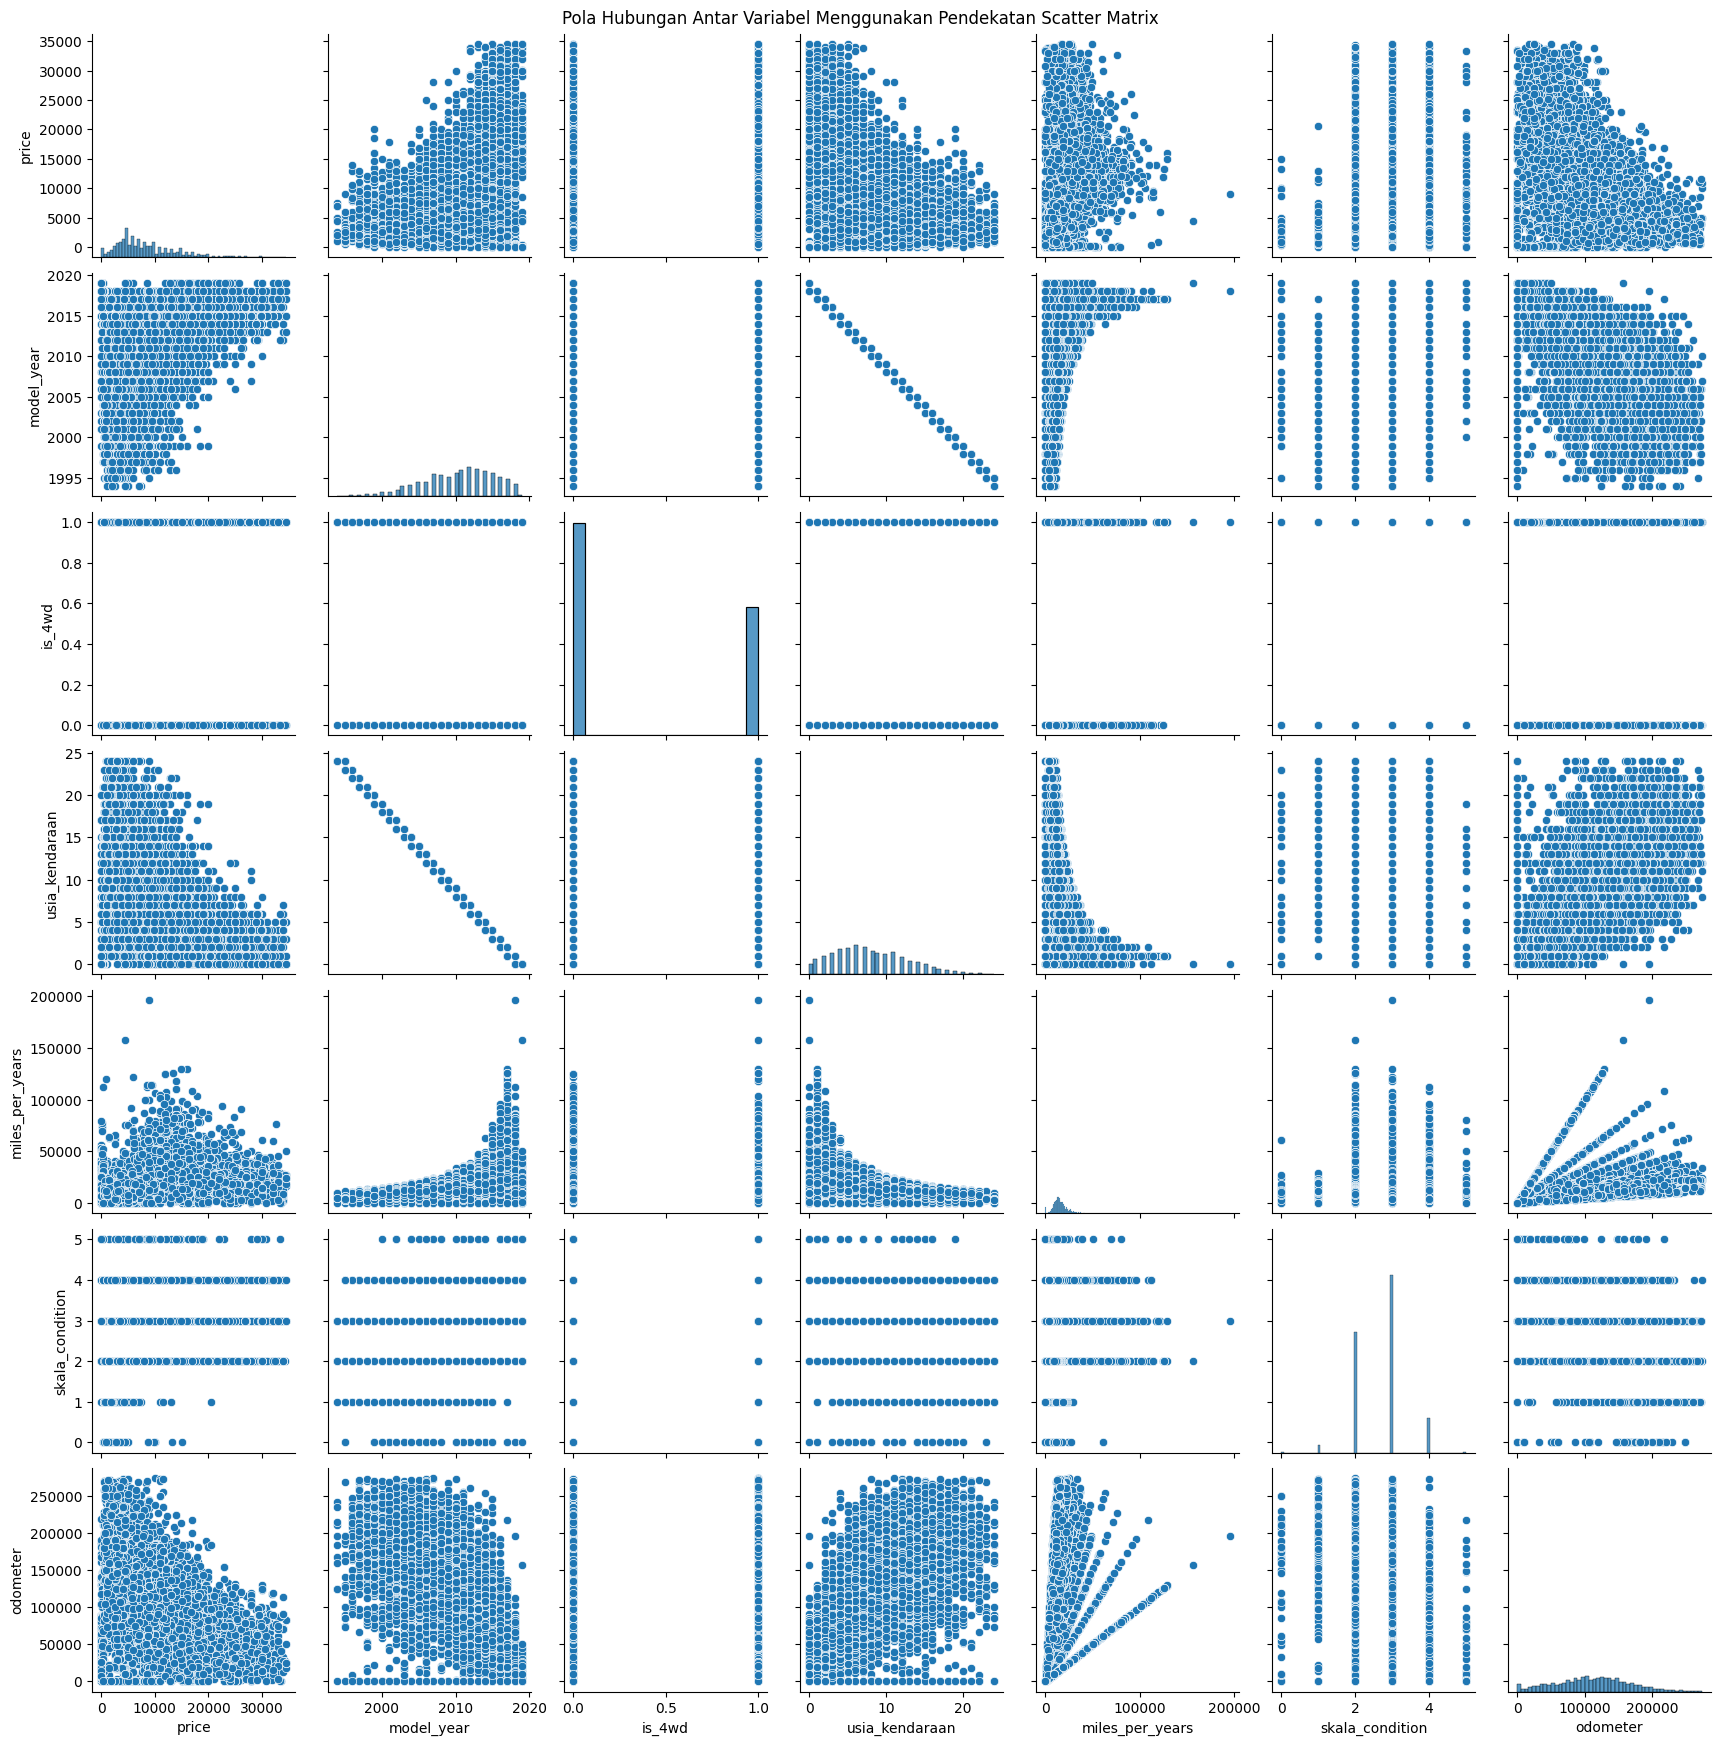

In [295]:
ax = sns.pairplot(
    df_normal_duration[['price', 'model_year', 'is_4wd', 'usia_kendaraan', 'miles_per_years', 'skala_condition', 'odometer']]
)
ax.fig.suptitle('Pola Hubungan Antar Variabel Menggunakan Pendekatan Scatter Matrix', y=1)

Selanjutnya kami akan mengidentifikasi pola hubungan untuk sejumlah variabel kategorikal terhadap harga kendaraan.

In [296]:
# Mengidentifikasi daftar variabel beratribut kategorikal

s = (df_normal_duration. dtypes == 'object')
object_cols = list(s[s].index)

print("Variabel dengan atribut categorical dalam kumpulan data:", object_cols)

Variabel dengan atribut categorical dalam kumpulan data: ['model', 'condition', 'fuel', 'transmission', 'type', 'paint_color', 'day_of_week_posted']


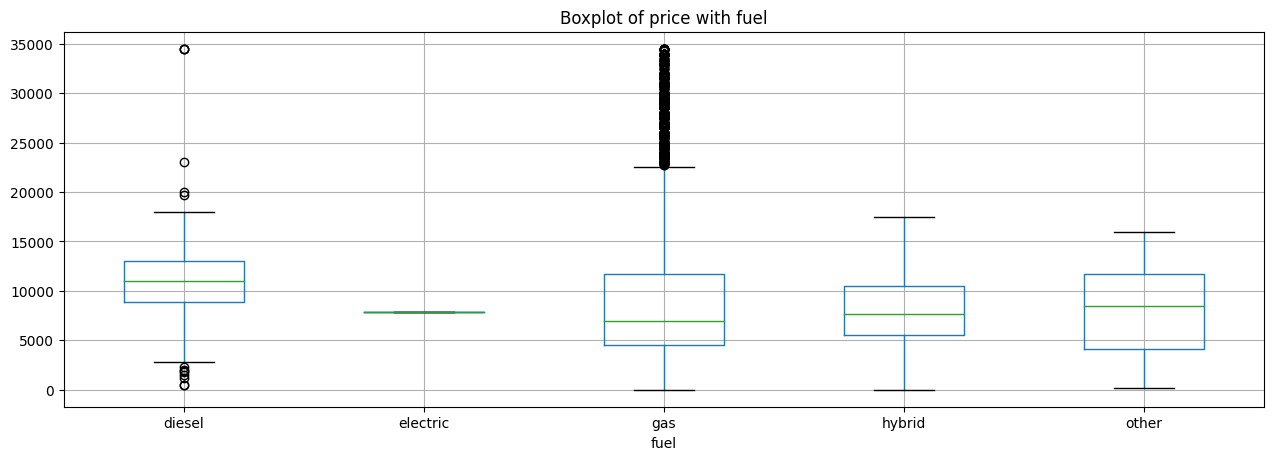

In [297]:
# identifikasi pola hubungan antar variabel menggunakan scatter matriks
df_normal_duration.boxplot(by='fuel', column='price', figsize=(15,5))
plt.title('Boxplot of price with fuel')
plt.suptitle("")
plt.show()

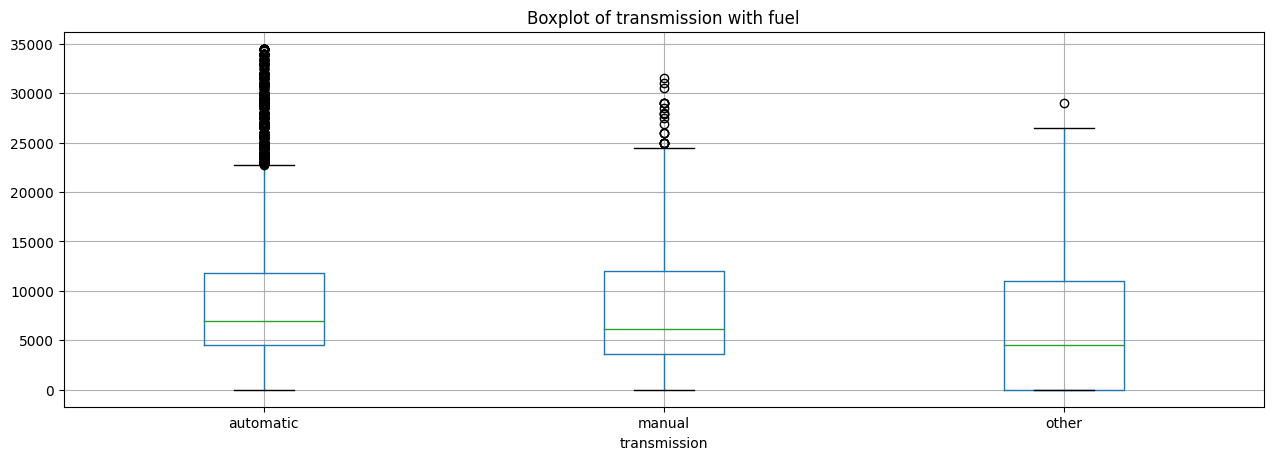

In [298]:
# identifikasi pola hubungan antar variabel menggunakan scatter matriks
df_normal_duration.boxplot(by='transmission', column='price', figsize=(15,5))
plt.title('Boxplot of transmission with fuel')
plt.suptitle("")
plt.show()

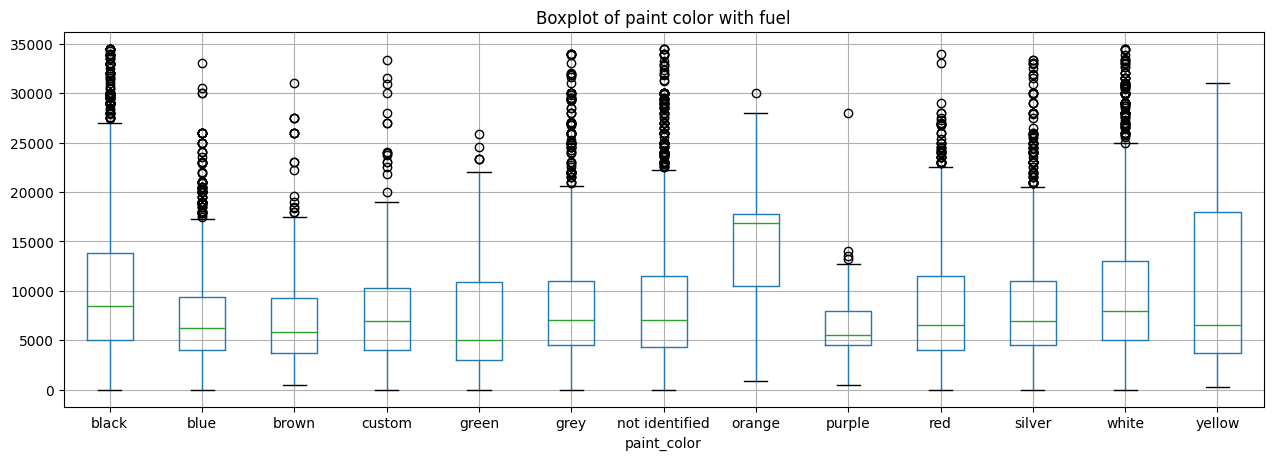

In [299]:
# identifikasi pola hubungan antar variabel menggunakan scatter matriks
df_normal_duration.boxplot(by='paint_color', column='price', figsize=(15,5))
plt.title('Boxplot of paint color with fuel')
plt.suptitle("")
plt.show()

## **Kesimpulan Umum**

Kami telah menyelesaikan keseluruhan rangkaian proses analisa untuk mengidentifikasi pola hubungan yang dapat menjelaskan aspek-aspek yang mempengaruhi harga dari suatu kendaraan. Proses kami diawali dengan menemukan baris data yang hilang untuk sejumlah kolom pada dataframe, dimana kami menemukan bahwa terdapat sekitar 50.4% baris data yang hilang untuk kolom is_4wd , 18% untuk kolom paint_color, 15.3% untuk kolom odometer, 10.2% untuk kolom cylinders, dan 7.02% untuk kolom model year. Setelah memastikan  bahwa baris yang hilang dari dataframe terjadi secara acak dikarenakan suatu problem teknikal, kami melanjutkan dengan menangani nilai yang hilang tersebut menggunakan metode *fillna* dan *dropna* sehingga diakhir proses ini kami masih dapat mempertahankan sekitar 98% data. Kami melanjutkan proses analisa dengan melakukan sejumlah manipulasi terhadap dataframe kami yang berhubungan dengan pengonversian tipe data, menambahkan kolom variabel kedalam dataset untuk pertimbangan efisiensi proses analisa, dan menghilangkan sejumlah besar outlier sekaligus mempertahankan sekitar 93% data yang kami miliki. Pada tahap awal pengkajian parameter setelah memperoleh data yang bersih, kami menemukan fakta yang menunjukkan bahwa secara rata-rata lama iklan ditayangkan untuk seluruh kendaraan adalah sekitar 1 bulan, namun sekitar 60% kendaraan dapat terjual dibawah angka rata-rata tersebut. Dikarenakan bervariasinya periode durasi pengiklanan suatu kendaraan, maka kami memutuskan untuk menetapkan suatu margin batas yang mengacu pada referensi umum untuk standar bisnis pemasaran otomotif dimana durasi standar untuk sebuah kendaraan dari semenjak mulai diiklankan hingga terjual adalah diantara periode 1 minggu hingga 2 bulan. Ini merupakan pertimbangan kami yang berdasarkan pada standarisasi hasil. Tahap akhir keseluruhan rangkaian proses analisa kami adalah untuk mempelajari pola hubungan antara sejumlah variabel terhadap harga rata-rata kendaraan. Pada akhirnya dataframe yang kami gunakan untuk mempelajari pola hubungan ini telah kami *filtering* dengan mempertimbangkan sejumlah kriteria, diantaranya keseluruhan baris data yang telah memenuhi standar bisnis dan hanya memuat 2 tipe kendaraan (sedan dan SUV) yang memiliki jumlah tayangan iklan dan disparitas harga rata-rata tertinggi, hasilnya adalah sebagai berikut :
1. Usia kendaraan memiliki hubungan negatif dan paling kuat terhadap harga kendaraan, dimana semakin tua usia kendaraan, semakin rendah harganya
2. Terdapat keanehan yang menunjukkan harga naik ketika jumlah mil yang ditempuh per tahun meningkat.
3. Kondisi kendaraan menunjukkan hubungan positif, dimana semakin baik kondisinya, maka harga akan meningkat